![title](.\images\DSA-Logo.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>Maio, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 04- Preprocessing The Data

Nesta etapa, vamos realizar a fase de **`Pré-processamento`** dos dados, utilizando o dataset de treinamento que foi preparado na etapa **`02-Get-The-Data`**, ou seja, o *data frame* que foi salvo no arquivo **`santander_train.pickle`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento, salvo no arquivo **`santander_train.pickle`**;


2. Restaurar as informações (objetos) importantes criados/alterados nas etapas da fase anterior (**`03- Análise Exploratória`**);


3. Criar novos **`objetos`** para documentarmos todas as alterações realizadas nesta etapa de **`Pré-processamento`**;


4. Remover do *data frame* as features **`Irrelevantes`**:


5. Realizar **`Feature Engineering`** com as features **`Relevantes`**, de acordo com o tipo de variável:

> 5.1 Variáveis do tipo **`Binary`** (Qualitativas Nominais Binárias) e **`Categorical`** (Qualitativas Nominais);

> 5.2 Variáveis do tipo **`Discrete`** (Quantitativas Discretas);

> 5.3 Variáveis do tipo **`Continuous`** (Quantitativas Contínuas).


6. Salvar informações (objetos) importantes criados e/ou alterados durante esta etapa de pré-processamento dos dados;


7. Salvar um "novo" *data frame* com os dados de treinamento, devido as alterações realizadas nesta etapa.

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Função de pré-processamento do pacote scikit-learning:
from sklearn.preprocessing import OneHotEncoder  # On Hot Encoding de atributos categóricos.
from sklearn.preprocessing import PowerTransformer # Power Transformer para atributos numéricos.
from sklearn.preprocessing import QuantileTransformer # Quantile Transformer para atributos numéricos.

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "04-Preprocessing")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_ML_Library_v1_0":
import DataScience_ML_Library_v1_0 as mllib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

numpy      1.18.2
pandas     0.25.3
seaborn    0.10.0
matplotlib 3.2.1
Walter Trevisan


## 01- Carregando o nosso *data frame* de treinamento: `santander_train.pickle`

In [3]:
# Carregando o objeto (data frame) "santander_train":
train_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_train.pickle",
                                    msg="The 'santander_train' (data frame) has been successfully uploaded!")

The 'santander_train' (data frame) has been successfully uploaded!


In [4]:
# Renomeando o label "ind_var10cte_ult1", em nosso dataset, para colocá-lo no mesmo padrão das outras variáveis (features).
train_df.rename(columns={'ind_var10cte_ult1': 'ind_var10_cte_ult1'}, inplace=True)

## 02 - Restaurando informações (`objetos`) importantes que serão utilizados nesta etapa:

Primeiro, vamos restaurar/carregar os seguintes `objetos` importantes que serão utilizados nesta etapa da fase `Pré-processamento`:

1. **`santander_relevant_feat`:** dicionário com as principais informações sobre cada uma das features **`Relevantes`**, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`), e também uma lista com as variáveis que são **`Irrelevantes`**, ou seja, que não serão analisadas para a criação dos modelos preditivos (`Irrelevant`).

In [5]:
# Carregando o objeto "santander_relevant_feat":
info = "The 'santander_relevant_feat' object has been successfully uploaded!"
santander_relevant_feat = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="santander_relevant_feat.pickle",
                                                 msg=info)

The 'santander_relevant_feat' object has been successfully uploaded!


## 03 - Criando `objetos` importantes:

Agora, vamos criar quatro novos objetos para documentar todas as ações que forem realizadas nas etapas de `Pré-processamento`:

1. **`santander_feat_eng`:** é um objeto do tipo *dicionário* com as informações sobre cada uma das transformações (**`Feature Engineering`**) que forem sendo realizadas nas features **`Relevantes`** do nosso *data frame*, por exemplo:

> **`PowerTransformation`**: contém os nomes das features `Quantitativas Discretas/Contínuas` onde aplicamos a padronização dos dados utilizando a função *PowerTransformer()*;

> **`OHE`**: contém os nomes das features `Qualitativas` (Categóricas) onde aplicamos o **`One-Hot Encoder`**.


2. **`ohe`:** objeto criado da função `OneHotEncoder()` para aplicarmos o "one-hot encoder" nas *features* categóricas do *data frame*;


3. **`pt`:** objeto criado da função `PowerTransformer()` para aplicarmos o "Power Transformer" (padronização dos dados) nas *features* quantitativas (discretas/contínuas) do *data frame*;


4. **`qt`:** objeto criado da função `QuantileTransformer()` para aplicarmos o "Quantile Transformer" (padronização dos dados) nas *features* quantitativas (discretas/contínuas) do *data frame*.

In [6]:
# 1. Criando um "dicionário" onde armazenaremos os nomes das features que foram criadas durante o processo
# de "Feature Engineering":
santander_feat_eng = {}
print("Object 'santander_feat_eng' was successfully created!")
print(santander_feat_eng.keys())

# 2. Criando uma instância do "OneHotEncoder" para codificarmos as categorias:
ohe = OneHotEncoder(handle_unknown='ignore')
print()
print("Object 'ohe' was successfully created!")
print(ohe)

# 3. Criando uma instância do "PowerTransformer" para fazermos a padronização das features numéricas:
pt = PowerTransformer()
print()
print("Object 'pt' was successfully created!")
print(pt)

# 3. Criando uma instância do "PowerTransformer" para fazermos a padronização das features numéricas:
qt = QuantileTransformer()
print()
print("Object 'qt' was successfully created!")
print(qt)

Object 'santander_feat_eng' was successfully created!
dict_keys([])

Object 'ohe' was successfully created!
OneHotEncoder(handle_unknown='ignore')

Object 'pt' was successfully created!
PowerTransformer()

Object 'qt' was successfully created!
QuantileTransformer()


## 04- Remover do *data frame* as features `Irrelevantes`:

In [7]:
# Resumo das features "Irrelevantes":
print("Irrelevant features: {}".format(santander_relevant_feat.count(keys=['Irrelevant'])))

Irrelevant features: 346


In [8]:
# Eliminando as features "Irrelevantes" do data frame:
train_df.drop(columns=santander_relevant_feat.get(key='Irrelevant'), inplace=True)

# Eliminando a feature "ID" (Primary Key) do data frame:
train_df.drop(columns='ID', inplace=True)

# Resumo do data frame:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 24 columns):
var15                       60816 non-null int64
ind_var30                   60816 non-null int64
num_var4                    60816 non-null int64
num_var5                    60816 non-null int64
num_var30                   60816 non-null int64
num_var35                   60816 non-null int64
num_var42                   60816 non-null int64
saldo_var5                  60816 non-null float64
saldo_var30                 60816 non-null float64
saldo_var42                 60816 non-null float64
var36                       60816 non-null int64
num_var22_ult3              60816 non-null int64
num_meses_var5_ult3         60816 non-null int64
num_meses_var39_vig_ult3    60816 non-null int64
num_var45_hace2             60816 non-null int64
num_var45_hace3             60816 non-null int64
num_var45_ult1              60816 non-null int64
num_var45_ult3              60816 non-null int64
sal

## 05- Realizar **`Feature Engineering`** de acordo com o tipo de variável:

In [9]:
# Resumo das features "relevantes" por tipo de informação:
print("Relevant features:")
print('     Binary: {}'.format(santander_relevant_feat.count(keys=['Binary'])))
print('    Ordinal: {}'.format(santander_relevant_feat.count(keys=['Ordinal'])))
print('Categorical: {}'.format(santander_relevant_feat.count(keys=['Categorical'])))
print('   Discrete: {}'.format(santander_relevant_feat.count(keys=['Discrete'])))
print(' Continuous: {}'.format(santander_relevant_feat.count(keys=['Continuous'])))
print('----------------')
print('      Total: {}'.format(santander_relevant_feat.count(keys=['Categorical', 'Binary', 'Ordinal', 'Discrete',
                                                                  'Continuous'])))

Relevant features:
     Binary: 1
    Ordinal: 0
Categorical: 4
   Discrete: 10
 Continuous: 8
----------------
      Total: 23


## 5.1- Variáveis `Categóricas`:

In [10]:
# Obtem todas as variáveis preditoras (features) categóricas (Relevantes):
category_feats = santander_relevant_feat.get(key='Binary') + santander_relevant_feat.get(key='Categorical')
print("Category features: {}".format(category_feats))

Category features: ['ind_var30', 'num_var4', 'var36', 'num_meses_var5_ult3', 'num_meses_var39_vig_ult3']


In [11]:
# Obtendo o número único de entradas em cada feature com dados categóricos:
category_num_unique = list(map(lambda feat: train_df[feat].nunique(), category_feats))
d = dict(zip(category_feats, category_num_unique))

# Imprime as categorias em ordem crescente pela quantidde de classes únicas:
sorted(d.items(), key=lambda x: x[1])

[('ind_var30', 2),
 ('num_meses_var5_ult3', 4),
 ('num_meses_var39_vig_ult3', 4),
 ('var36', 5),
 ('num_var4', 8)]

A saída acima mostra, para cada `feature` com dados categóricos, o número de valores exclusivos na *feature*. Por exemplo, a *feature* `num_meses_var5_ult3` possui `quatro` valores únicos: `0`, `1`, `2` e `3`.

Nós nos referimos ao número de entradas exclusivas de uma variável categórica como a **cardinalidade** dessa variável categórica. Por exemplo, a variável `num_meses_var5_ult3` têm **cardinalidade igual a 4**.

### Aplicando a função `OneHotEncoder()` nas features `Categóricas` (Qualitativas) do *data frame*:

***One-hot encoding (Codificação One-hot)***: utilizaremos a função ***`OneHotEncoder`*** do pacote ***`scikit-learning`***

Então, vamos experimentar a codificação ***one-hot***. Mas, em vez de codificarmos todas as variáveis categóricas no conjunto de dados **train_df**, criaremos somente uma codificação one-hot para as features com **cardinalidade menor que 10**.

In [12]:
# Definindo as "features" onde aplicaremos "one-hot encoded" (Codificação One-Hot):
low_cardinality_feats = [feat for feat in category_feats if train_df[feat].nunique() < 10]

print('Categorical variables where we will apply "one-hot encoded"":', low_cardinality_feats)

Categorical variables where we will apply "one-hot encoded"": ['ind_var30', 'num_var4', 'var36', 'num_meses_var5_ult3', 'num_meses_var39_vig_ult3']


In [13]:
# Criando uma cópia do dataset de treino que contém apenas os atributos categóricos:
train_cat = train_df[low_cardinality_feats].copy()

# Aplicando o "one-hot encoding" nos dados de treino:
train_cat_ohe = ohe.fit_transform(X=train_cat.values).toarray()

# Definindo os nomes das features:
cat_labels = [feat + '_cat' for feat in low_cardinality_feats]
feat_names = list(ohe.get_feature_names(cat_labels))

# Criando um data frame com as features "OHE":
train_cat_ohe_df = pd.DataFrame(data=train_cat_ohe, columns=feat_names)

# Incluindo as features "OHE" em nosso data frame de treinamento:
train_df = pd.concat([train_df, train_cat_ohe_df], axis=1de treinamento)

# Excluindo as "features" categóricas do nosso data frame de treinamento, porque as mesmas já foram transformadas (OHE):
train_df.drop(columns=low_cardinality_feats, inplace=True)

# Resumo do nosso data frame de treinamento:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 42 columns):
var15                             60816 non-null int64
num_var5                          60816 non-null int64
num_var30                         60816 non-null int64
num_var35                         60816 non-null int64
num_var42                         60816 non-null int64
saldo_var5                        60816 non-null float64
saldo_var30                       60816 non-null float64
saldo_var42                       60816 non-null float64
num_var22_ult3                    60816 non-null int64
num_var45_hace2                   60816 non-null int64
num_var45_hace3                   60816 non-null int64
num_var45_ult1                    60816 non-null int64
num_var45_ult3                    60816 non-null int64
saldo_medio_var5_hace2            60816 non-null float64
saldo_medio_var5_hace3            60816 non-null float64
saldo_medio_var5_ult1             60816 non-null float64

In [14]:
# Salvando as features categóricas, onde aplicamos "one-hot encoded" (OHE), no objeto "santander_feat_eng":
santander_feat_eng["OHE"] = low_cardinality_feats

# Visializando as "features":
print("Feature Engineering (OHE): {}".format(len(low_cardinality_feats)))
print(santander_feat_eng["OHE"])

Feature Engineering (OHE): 5
['ind_var30', 'num_var4', 'var36', 'num_meses_var5_ult3', 'num_meses_var39_vig_ult3']


## 5.2- Variáveis `Quantitativas Discretas`:

In [15]:
# Obtem todas as variáveis preditoras (features) "Quantitativas Discretas" (Relevantes):
discrete_feats = santander_relevant_feat.get(key='Discrete')
print("Discrete features: {}".format(discrete_feats))

Discrete features: ['var15', 'num_var35', 'num_var42', 'num_var22_ult3', 'num_var30', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'num_var5']


In [16]:
# Resumo Estatístico:
train_df[discrete_feats].describe().round(decimals=3)

,var15,num_var35,num_var42,num_var22_ult3,num_var30,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,num_var5
count,60816.000,60816.000,60816.000,60816.000,60816.000,60816.000,60816.000,60816.000,60816.000,60816.000
mean,33.219,3.303,2.219,3.059,2.384,5.387,3.871,4.361,13.619,2.000
std,12.947,2.872,1.499,6.246,1.643,14.410,10.327,14.260,33.061,1.432
min,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,23.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,28.000,3.000,3.000,0.000,3.000,0.000,0.000,0.000,0.000,3.000
75%,40.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,12.000,3.000
max,105.000,36.000,18.000,234.000,33.000,342.000,333.000,510.000,801.000,15.000


In [17]:
# Resumo Estatístico:
dslib.statistical_measures(df=train_df, feature=discrete_feats)

,var15,num_var35,num_var42,num_var22_ult3,num_var30,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,num_var5
mean,33.219,3.303,2.219,3.059,2.384,5.387,3.871,4.361,13.619,2.000
median,28.000,3.000,3.000,0.000,3.000,0.000,0.000,0.000,0.000,3.000
mode,23.000,3.000,3.000,0.000,3.000,0.000,0.000,0.000,0.000,3.000
var,167.634,8.247,2.248,39.008,2.699,207.636,106.646,203.354,1093.033,2.050
std,12.947,2.872,1.499,6.246,1.643,14.410,10.327,14.260,33.061,1.432
var_coff,38.976,86.949,67.558,204.163,68.899,267.484,266.787,327.025,242.765,71.603
skewness,1.573,1.306,-0.330,4.425,0.274,6.349,6.810,8.463,6.337,-0.619
kurtosis,2.485,3.583,0.052,57.935,3.337,64.379,90.402,129.646,68.382,-1.279


Saving figure: plot_KDE_discrete_feats


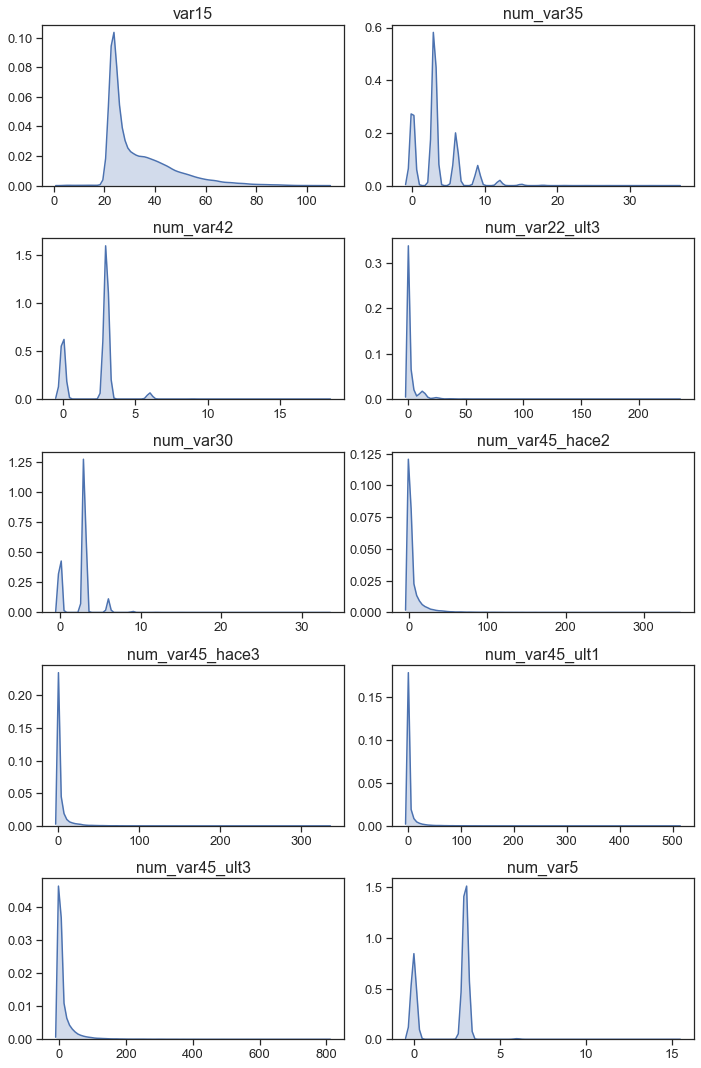

In [18]:
# Criando os plots KDEs para as features:
ptlib.plot_kde_features(df=train_df, features=discrete_feats, gridsize=100, plot_style='ticks', colors='b',
                        titles=discrete_feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, ylabels=None,
                        ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=2, rows_nr=5, width=10,
                        height=15, wspace=None, hspace=0.3,
                        figure_id="plot_KDE_discrete_feats", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:**

Todas as `features` possuem `outliers` (muito grandes em quase todas as features), de acordo com a nossa análise exploratória, e também conforme podemos observar nos gráficos acima. Também notamos que as `features`possuem escalas diferentes.

1. A feature **`var15`** possui uma alta distribuição assimétrica positiva (*`skewness=1.57`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`23`**;

2. A feature **`num_var35`** possui uma alta distribuição assimétrica positiva (*`skewness=1.30`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`3`**;

3. A feature **`num_var42`** possui uma distribuição assimétrica negativa (*`skewness=-0.33`*), ou seja, a sua distribuição apresenta uma *calda à esquerda*. Também observamos um *pico de frequências* para o valor **`3`**;

4. A feature **`num_var22_ult3`** possui uma alta distribuição assimétrica positiva (*`skewness=4.42`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

5. A feature **`num_var30`** possui uma distribuição assimétrica positiva (*`skewness=0.27`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`3`**;

6. A feature **`num_var45_hace2`** possui uma alta distribuição assimétrica positiva (*`skewness=6.35`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

7. A feature **`num_var45_hace3`** possui uma alta distribuição assimétrica positiva (*`skewness=6.81`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

8. A feature **`num_var45_ult1`** possui uma alta distribuição assimétrica positiva (*`skewness=8.46`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

9. A feature **`num_var45_ult3`** possui uma alta distribuição assimétrica positiva (*`skewness=6.34`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

10. A feature **`num_var5`** possui uma distribuição assimétrica negativa (*`skewness=-0.62`*), ou seja, a sua distribuição apresenta uma *calda à esquerda*. Também observamos um *pico de frequências* para o valor **`3`**.

### `Feature Engineering`

Sabemos que muitos estimadores (algoritmos de *machine learning*) são concebidos com o pressuposto de que cada *feature* tenha valores próximos de zero (média) ou, mais importante ainda, que todas as *features* variam em escalas comparáveis. Em particular, os estimadores baseados em métricas e em gradientes assumem frequentemente dados aproximadamente padronizados (*features* centradas com variâncias unitárias). Uma excepção notável são os estimadores baseados em árvores de decisão, que são robustos a escalas arbitrárias dos dados.

Portanto, vamos aplicar e analisar algumas transformações em cada *feature* com o objetivo de prepará-las para as etapas de `Machine Learning`.

## `var15`

In [19]:
# Aplicando as transformações de escala na feature:
var15_df = mllib.scalers_transform(df=train_df, feature='var15')

# Visualizando as transformações:
var15_df

,var15,var15_sts,var15_mms,var15_rs,var15_pt,var15_qt
0,22,-0.866496,0.17,-0.352941,-1.107156,-2.345158
1,79,3.535981,0.74,3.000000,2.271456,2.408550
2,29,-0.325841,0.24,0.058824,-0.126112,0.098013
3,29,-0.325841,0.24,0.058824,-0.126112,0.098013
4,25,-0.634786,0.20,-0.176471,-0.632092,-0.279606
...,...,...,...,...,...,...
60811,23,-0.789259,0.18,-0.294118,-0.937671,-1.044409
60812,38,0.369287,0.33,0.588235,0.681240,0.590949
60813,45,0.909942,0.40,1.000000,1.119218,0.965420
60814,23,-0.789259,0.18,-0.294118,-0.937671,-1.044409


In [20]:
# Resumo estatístico:
dslib.statistical_measures(df=var15_df, feature=list(var15_df.columns))

,var15,var15_sts,var15_mms,var15_rs,var15_pt,var15_qt
mean,33.219,-0.000000e+00,0.282,0.307,0.000000e+00,0.020
median,28.000,-4.030000e-01,0.230,0.000,-2.420000e-01,0.034
mode,23.000,-7.890000e-01,0.180,-0.294,-9.380000e-01,-1.044
var,167.634,1.000000e+00,0.017,0.580,1.000000e+00,0.916
std,12.947,1.000000e+00,0.129,0.762,1.000000e+00,0.957
var_coff,38.976,-3.115290e+17,45.882,248.094,2.353125e+16,4728.082
skewness,1.573,1.573000e+00,1.573,1.573,-1.740000e-01,0.149
kurtosis,2.485,2.485000e+00,2.485,2.485,5.397000e+00,0.215


Saving figure: plot_kde_fe_var15


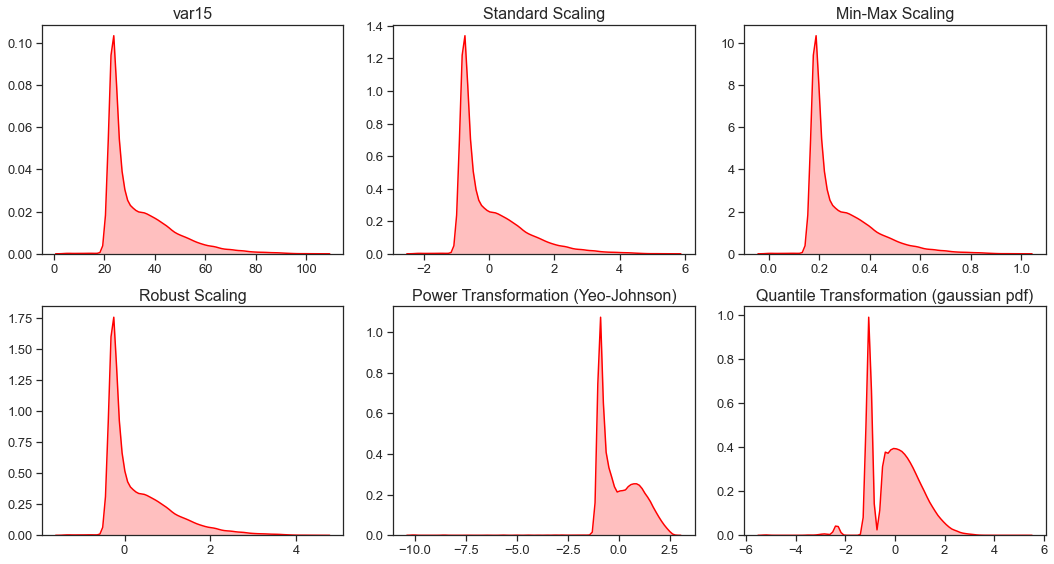

In [21]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['var15', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=var15_df, features=list(var15_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_var15", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-0.174`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`var15_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [22]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"] = ['var15']

## `num_var35`

In [23]:
# Aplicando as transformações de escala na feature:
num_var35_df = mllib.scalers_transform(df=train_df, feature='num_var35')

# Visualizando as transformações:
num_var35_df

,num_var35,num_var35_sts,num_var35_mms,num_var35_rs,num_var35_pt,num_var35_qt
0,3,-0.105421,0.083333,0.0,0.121967,0.015055
1,6,0.939273,0.166667,1.0,0.997301,0.979511
2,3,-0.105421,0.083333,0.0,0.121967,0.015055
3,3,-0.105421,0.083333,0.0,0.121967,0.015055
4,3,-0.105421,0.083333,0.0,0.121967,0.015055
...,...,...,...,...,...,...
60811,3,-0.105421,0.083333,0.0,0.121967,0.015055
60812,0,-1.150115,0.000000,-1.0,-1.455706,-5.199338
60813,12,3.028660,0.333333,3.0,2.177009,2.211127
60814,3,-0.105421,0.083333,0.0,0.121967,0.015055


In [24]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var35_df, feature=list(num_var35_df.columns))

,num_var35,num_var35_sts,num_var35_mms,num_var35_rs,num_var35_pt,num_var35_qt
mean,3.303,0.000000e+00,0.092,0.101,0.000000e+00,-1.018
median,3.000,-1.050000e-01,0.083,0.000,1.220000e-01,0.015
mode,3.000,-1.050000e-01,0.083,0.000,1.220000e-01,0.015
var,8.247,1.000000e+00,0.006,0.916,1.000000e+00,6.347
std,2.872,1.000000e+00,0.080,0.957,1.000000e+00,2.519
var_coff,86.949,3.092724e+17,86.949,948.585,1.344894e+17,-247.449
skewness,1.306,1.306000e+00,1.306,1.306,-6.000000e-02,-0.934
kurtosis,3.583,3.583000e+00,3.583,3.583,-4.850000e-01,-0.824


Saving figure: plot_kde_fe_num_var35


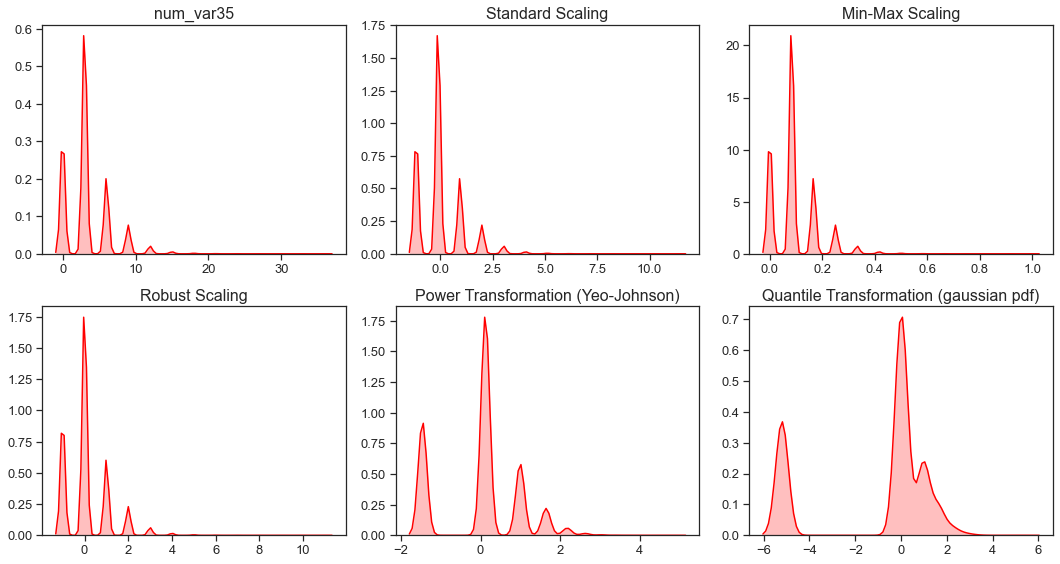

In [25]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var35', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var35_df, features=list(num_var35_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var35", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-0.06`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var35_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [26]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var35')

## `num_var42`

In [27]:
# Aplicando as transformações de escala na feature:
num_var42_df = mllib.scalers_transform(df=train_df, feature='num_var42')

# Visualizando as transformações:
num_var42_df

,num_var42,num_var42_sts,num_var42_mms,num_var42_rs,num_var42_pt,num_var42_qt
0,3,0.520785,0.166667,0.0,0.510622,0.332198
1,6,2.521799,0.333333,1.0,2.636463,2.196894
2,3,0.520785,0.166667,0.0,0.510622,0.332198
3,3,0.520785,0.166667,0.0,0.510622,0.332198
4,3,0.520785,0.166667,0.0,0.510622,0.332198
...,...,...,...,...,...,...
60811,3,0.520785,0.166667,0.0,0.510622,0.332198
60812,0,-1.480229,0.000000,-1.0,-1.467375,-5.199338
60813,3,0.520785,0.166667,0.0,0.510622,0.332198
60814,3,0.520785,0.166667,0.0,0.510622,0.332198


In [28]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var42_df, feature=list(num_var42_df.columns))

,num_var42,num_var42_sts,num_var42_mms,num_var42_rs,num_var42_pt,num_var42_qt
mean,2.219,-0.000000e+00,0.123,-0.260,0.000000e+00,-1.210
median,3.000,5.210000e-01,0.167,0.000,5.110000e-01,0.332
mode,3.000,5.210000e-01,0.167,0.000,5.110000e-01,0.332
var,2.248,1.000000e+00,0.007,0.250,1.000000e+00,6.533
std,1.499,1.000000e+00,0.083,0.500,1.000000e+00,2.556
var_coff,67.558,-1.209444e+17,67.558,-192.019,1.215569e+17,-211.231
skewness,-0.330,-3.300000e-01,-0.330,-0.330,-2.270000e-01,-0.879
kurtosis,0.052,5.200000e-02,0.052,0.052,4.560000e-01,-1.111


Saving figure: plot_kde_fe_num_var42


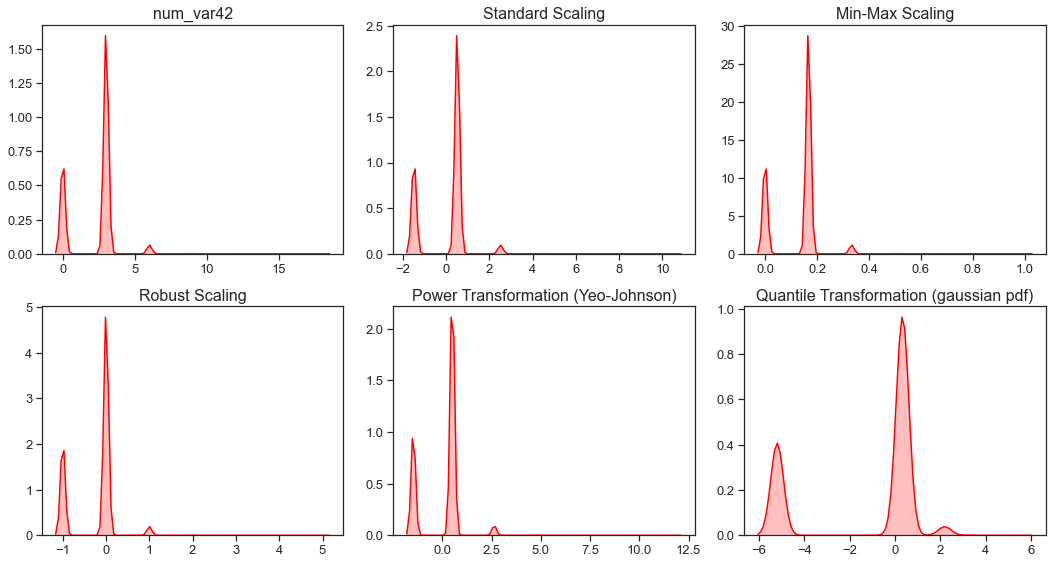

In [29]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var42', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var42_df, features=list(num_var42_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var42", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-0.23`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var42_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [30]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var42')

## `num_var22_ult3`

In [31]:
# Aplicando as transformações de escala na feature:
num_var22_ult3_df = mllib.scalers_transform(df=train_df, feature='num_var22_ult3')

# Visualizando as transformações:
num_var22_ult3_df

,num_var22_ult3,num_var22_ult3_sts,num_var22_ult3_mms,num_var22_ult3_rs,num_var22_ult3_pt,num_var22_ult3_qt
0,0,-0.489809,0.000000,0.0,-0.718720,-5.199338
1,0,-0.489809,0.000000,0.0,-0.718720,-5.199338
2,0,-0.489809,0.000000,0.0,-0.718720,-5.199338
3,0,-0.489809,0.000000,0.0,-0.718720,-5.199338
4,0,-0.489809,0.000000,0.0,-0.718720,-5.199338
...,...,...,...,...,...,...
60811,9,0.951209,0.038462,3.0,1.496274,1.152175
60812,3,-0.009470,0.012821,1.0,1.122319,0.571638
60813,18,2.392227,0.076923,6.0,1.615574,1.805023
60814,0,-0.489809,0.000000,0.0,-0.718720,-5.199338


In [32]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var22_ult3_df, feature=list(num_var22_ult3_df.columns))

,num_var22_ult3,num_var22_ult3_sts,num_var22_ult3_mms,num_var22_ult3_rs,num_var22_ult3_pt,num_var22_ult3_qt
mean,3.059,0.000000e+00,0.013,1.020,-0.000000e+00,-3.046
median,0.000,-4.900000e-01,0.000,0.000,-7.190000e-01,-5.199
mode,0.000,-4.900000e-01,0.000,0.000,-7.190000e-01,-5.199
var,39.008,1.000000e+00,0.001,4.334,1.000000e+00,8.949
std,6.246,1.000000e+00,0.027,2.082,1.000000e+00,2.991
var_coff,204.163,1.016316e+17,204.163,204.163,-1.885447e+17,-98.211
skewness,4.425,4.425000e+00,4.425,4.425,7.000000e-01,0.693
kurtosis,57.935,5.793500e+01,57.935,57.935,-1.453000e+00,-1.464


Saving figure: plot_kde_fe_num_var22_ult3


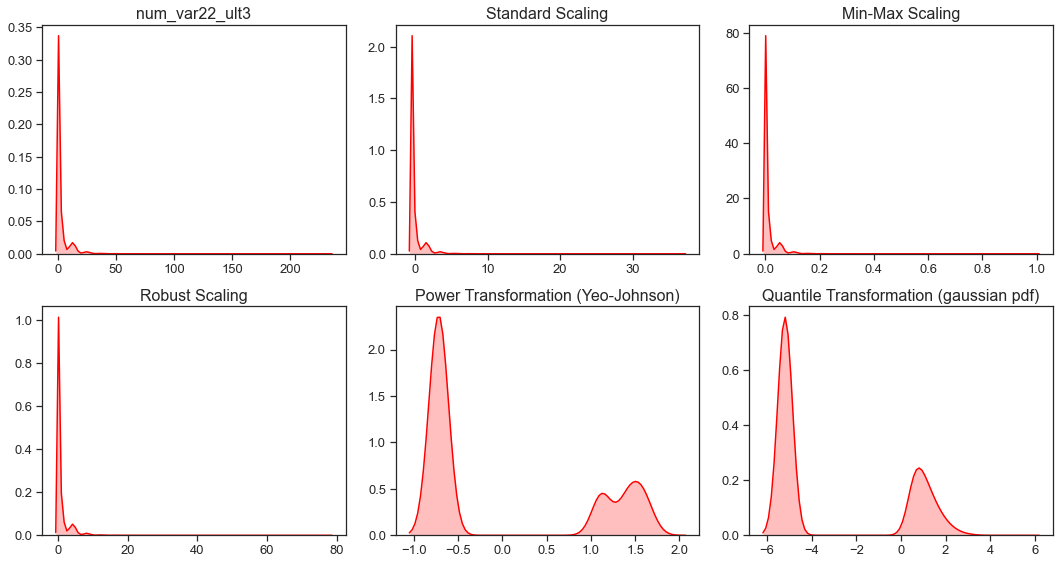

In [33]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var22_ult3', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var22_ult3_df, features=list(num_var22_ult3_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var22_ult3", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=0.70`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var22_ult3_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [34]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var22_ult3')

## `num_var30`

In [35]:
# Aplicando as transformações de escala na feature:
num_var30_df = mllib.scalers_transform(df=train_df, feature='num_var30')

# Visualizando as transformações:
num_var30_df

,num_var30,num_var30_sts,num_var30_mms,num_var30_rs,num_var30_pt,num_var30_qt
0,3,0.374784,0.090909,0.0,0.407101,0.266584
1,6,2.200987,0.181818,1.0,2.057899,1.873053
2,3,0.374784,0.090909,0.0,0.407101,0.266584
3,3,0.374784,0.090909,0.0,0.407101,0.266584
4,3,0.374784,0.090909,0.0,0.407101,0.266584
...,...,...,...,...,...,...
60811,3,0.374784,0.090909,0.0,0.407101,0.266584
60812,0,-1.451420,0.000000,-1.0,-1.496967,-5.199338
60813,3,0.374784,0.090909,0.0,0.407101,0.266584
60814,3,0.374784,0.090909,0.0,0.407101,0.266584


In [36]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var30_df, feature=list(num_var30_df.columns))

,num_var30,num_var30_sts,num_var30_mms,num_var30_rs,num_var30_pt,num_var30_qt
mean,2.384,0.000000e+00,0.072,-0.205,0.000000e+00,-1.097
median,3.000,3.750000e-01,0.091,0.000,4.070000e-01,0.267
mode,3.000,3.750000e-01,0.091,0.000,4.070000e-01,0.267
var,2.699,1.000000e+00,0.002,0.300,1.000000e+00,6.279
std,1.643,1.000000e+00,0.050,0.548,1.000000e+00,2.506
var_coff,68.899,1.131019e+17,68.899,-266.823,2.472016e+17,-228.352
skewness,0.274,2.740000e-01,0.274,0.274,-8.200000e-02,-0.958
kurtosis,3.337,3.337000e+00,3.337,3.337,1.078000e+00,-0.892


Saving figure: plot_kde_fe_num_var30


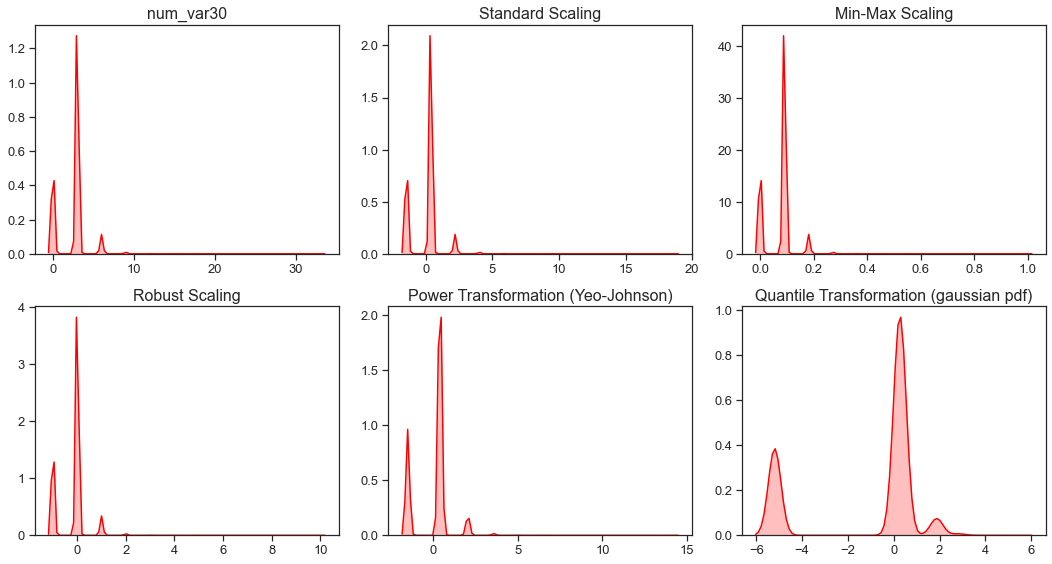

In [37]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var30', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var30_df, features=list(num_var30_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var30", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-0.082`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var30_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [38]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var30')

## `num_var45_hace2`

In [39]:
# Aplicando as transformações de escala na feature:
num_var45_hace2_df = mllib.scalers_transform(df=train_df, feature='num_var45_hace2')

# Visualizando as transformações:
num_var45_hace2_df

,num_var45_hace2,num_var45_hace2_sts,num_var45_hace2_mms,num_var45_hace2_rs,num_var45_hace2_pt,num_var45_hace2_qt
0,0,-0.373857,0.000000,0.0,-0.737215,-5.199338
1,6,0.042536,0.017544,2.0,1.273310,0.779924
2,0,-0.373857,0.000000,0.0,-0.737215,-5.199338
3,0,-0.373857,0.000000,0.0,-0.737215,-5.199338
4,0,-0.373857,0.000000,0.0,-0.737215,-5.199338
...,...,...,...,...,...,...
60811,0,-0.373857,0.000000,0.0,-0.737215,-5.199338
60812,0,-0.373857,0.000000,0.0,-0.737215,-5.199338
60813,6,0.042536,0.017544,2.0,1.273310,0.779924
60814,0,-0.373857,0.000000,0.0,-0.737215,-5.199338


In [40]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var45_hace2_df, feature=list(num_var45_hace2_df.columns))

,num_var45_hace2,num_var45_hace2_sts,num_var45_hace2_mms,num_var45_hace2_rs,num_var45_hace2_pt,num_var45_hace2_qt
mean,5.387,0.000000e+00,0.016,1.796,0.000000e+00,-2.967
median,0.000,-3.740000e-01,0.000,0.000,-7.370000e-01,-5.199
mode,0.000,-3.740000e-01,0.000,0.000,-7.370000e-01,-5.199
var,207.636,1.000000e+00,0.002,23.071,1.000000e+00,9.051
std,14.410,1.000000e+00,0.042,4.803,1.000000e+00,3.009
var_coff,267.484,2.285452e+17,267.484,267.484,3.796163e+18,-101.410
skewness,6.349,6.349000e+00,6.349,6.349,6.670000e-01,0.631
kurtosis,64.379,6.437900e+01,64.379,64.379,-1.461000e+00,-1.544


Saving figure: plot_kde_fe_num_var45_hace2


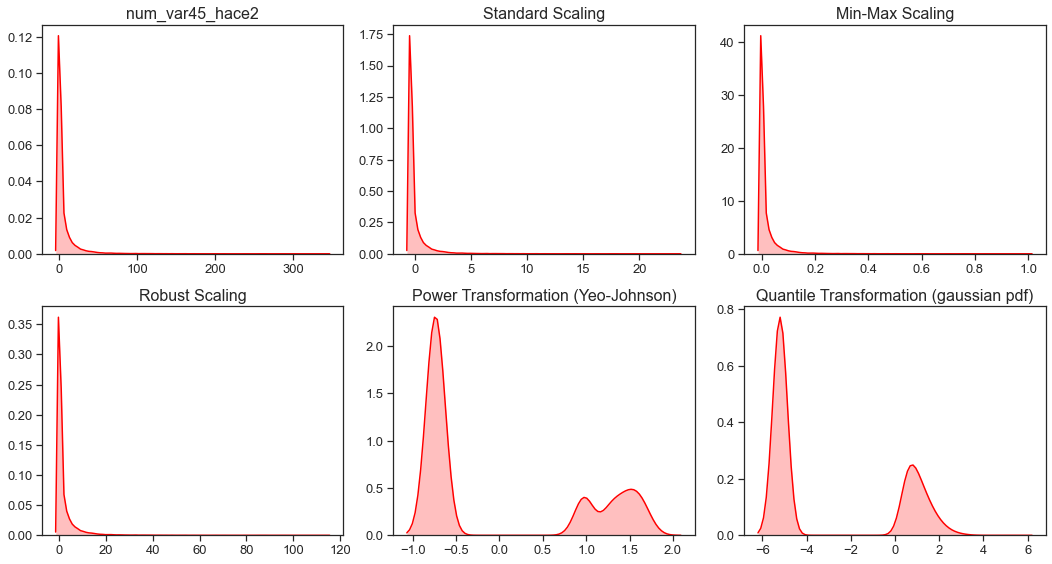

In [41]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var45_hace2', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var45_hace2_df, features=list(num_var45_hace2_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var45_hace2", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=0.67`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var45_hace2_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [42]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var45_hace2')

## `num_var45_hace3`

In [43]:
# Aplicando as transformações de escala na feature:
num_var45_hace3_df = mllib.scalers_transform(df=train_df, feature='num_var45_hace3')

# Visualizando as transformações:
num_var45_hace3_df

,num_var45_hace3,num_var45_hace3_sts,num_var45_hace3_mms,num_var45_hace3_rs,num_var45_hace3_pt,num_var45_hace3_qt
0,0,-0.374833,0.000000,0.0,-0.702132,-5.199338
1,3,-0.084329,0.009009,1.0,1.151069,0.608973
2,0,-0.374833,0.000000,0.0,-0.702132,-5.199338
3,0,-0.374833,0.000000,0.0,-0.702132,-5.199338
4,0,-0.374833,0.000000,0.0,-0.702132,-5.199338
...,...,...,...,...,...,...
60811,3,-0.084329,0.009009,1.0,1.151069,0.608973
60812,0,-0.374833,0.000000,0.0,-0.702132,-5.199338
60813,3,-0.084329,0.009009,1.0,1.151069,0.608973
60814,0,-0.374833,0.000000,0.0,-0.702132,-5.199338


In [44]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var45_hace3_df, feature=list(num_var45_hace3_df.columns))

,num_var45_hace3,num_var45_hace3_sts,num_var45_hace3_mms,num_var45_hace3_rs,num_var45_hace3_pt,num_var45_hace3_qt
mean,3.871,-0.000000e+00,0.012,1.290,-0.000000e+00,-3.102
median,0.000,-3.750000e-01,0.000,0.000,-7.020000e-01,-5.199
mode,0.000,-3.750000e-01,0.000,0.000,-7.020000e-01,-5.199
var,106.646,1.000000e+00,0.001,11.850,1.000000e+00,8.878
std,10.327,1.000000e+00,0.031,3.442,1.000000e+00,2.980
var_coff,266.787,-8.890326e+17,266.787,266.787,-4.711006e+17,-96.048
skewness,6.810,6.810000e+00,6.810,6.810,7.530000e-01,0.741
kurtosis,90.402,9.040200e+01,90.402,90.402,-1.369000e+00,-1.397


Saving figure: plot_kde_fe_num_var45_hace3


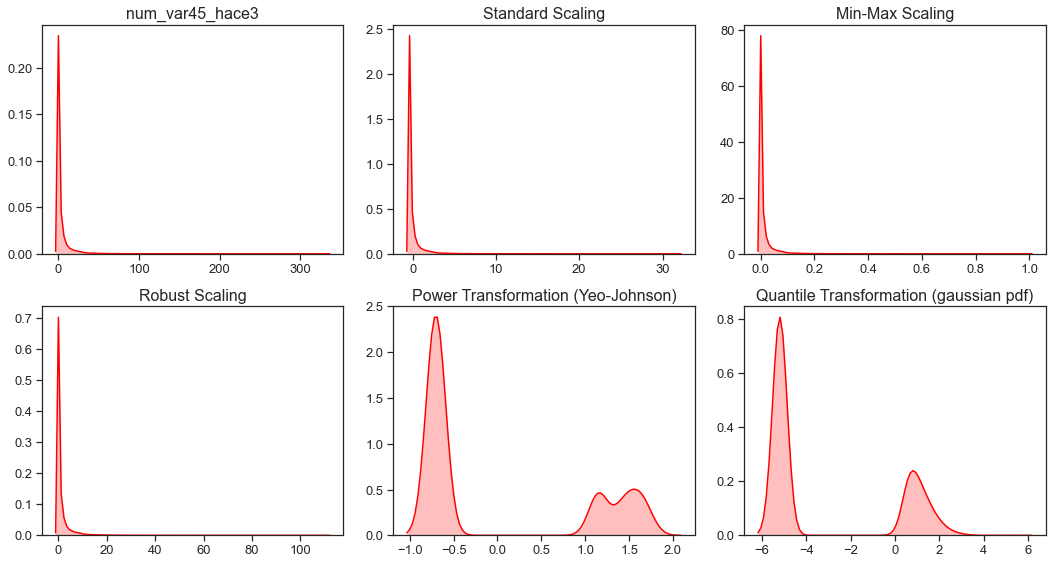

In [45]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var45_hace3', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var45_hace3_df, features=list(num_var45_hace3_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var45_hace3", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=0.75`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var45_hace3_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [46]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var45_hace3')

## `num_var45_ult1`

In [47]:
# Aplicando as transformações de escala na feature:
num_var45_ult1_df = mllib.scalers_transform(df=train_df, feature='num_var45_ult1')

# Visualizando as transformações:
num_var45_ult1_df

,num_var45_ult1,num_var45_ult1_sts,num_var45_ult1_mms,num_var45_ult1_rs,num_var45_ult1_pt,num_var45_ult1_qt
0,0,-0.305790,0.000000,0.0,-0.627637,-5.199338
1,3,-0.095413,0.005882,1.0,1.357025,0.711981
2,0,-0.305790,0.000000,0.0,-0.627637,-5.199338
3,0,-0.305790,0.000000,0.0,-0.627637,-5.199338
4,0,-0.305790,0.000000,0.0,-0.627637,-5.199338
...,...,...,...,...,...,...
60811,9,0.325341,0.017647,3.0,1.657809,1.147315
60812,0,-0.305790,0.000000,0.0,-0.627637,-5.199338
60813,60,3.901751,0.117647,20.0,1.787462,2.241016
60814,0,-0.305790,0.000000,0.0,-0.627637,-5.199338


In [48]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var45_ult1_df, feature=list(num_var45_ult1_df.columns))

,num_var45_ult1,num_var45_ult1_sts,num_var45_ult1_mms,num_var45_ult1_rs,num_var45_ult1_pt,num_var45_ult1_qt
mean,4.361,-0.000000e+00,0.009,1.454,0.000000e+00,-3.383
median,0.000,-3.060000e-01,0.000,0.000,-6.280000e-01,-5.199
mode,0.000,-3.060000e-01,0.000,0.000,-6.280000e-01,-5.199
var,203.354,1.000000e+00,0.001,22.595,1.000000e+00,8.380
std,14.260,1.000000e+00,0.028,4.753,1.000000e+00,2.895
var_coff,327.025,-2.573084e+17,327.025,327.025,1.799561e+17,-85.565
skewness,8.463,8.463000e+00,8.463,8.463,9.820000e-01,0.987
kurtosis,129.646,1.296460e+02,129.646,129.646,-9.990000e-01,-0.976


Saving figure: plot_kde_fe_num_var45_ult1


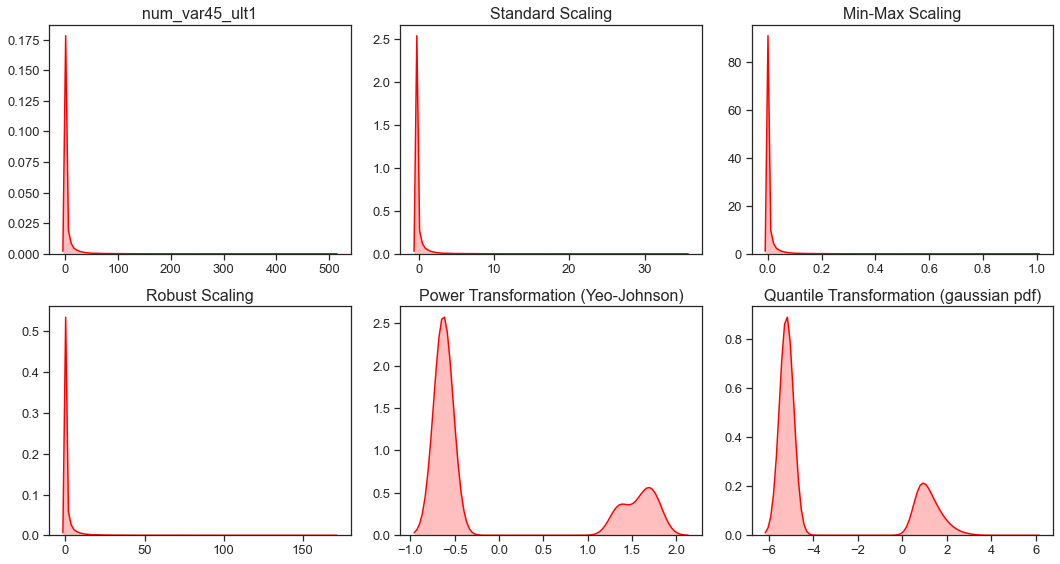

In [49]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var45_ult1', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var45_ult1_df, features=list(num_var45_ult1_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var45_ult1", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=0.98`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var45_ult1_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [50]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var45_ult1')

## `num_var45_ult3`

In [51]:
# Aplicando as transformações de escala na feature:
num_var45_ult3_df = mllib.scalers_transform(df=train_df, feature='num_var45_ult3')

# Visualizando as transformações:
num_var45_ult3_df

,num_var45_ult3,num_var45_ult3_sts,num_var45_ult3_mms,num_var45_ult3_rs,num_var45_ult3_pt,num_var45_ult3_qt
0,0,-0.411924,0.000000,0.00,-0.940158,-5.199338
1,12,-0.048956,0.014981,1.00,0.962167,0.639462
2,0,-0.411924,0.000000,0.00,-0.940158,-5.199338
3,0,-0.411924,0.000000,0.00,-0.940158,-5.199338
4,0,-0.411924,0.000000,0.00,-0.940158,-5.199338
...,...,...,...,...,...,...
60811,12,-0.048956,0.014981,1.00,0.962167,0.639462
60812,0,-0.411924,0.000000,0.00,-0.940158,-5.199338
60813,69,1.675141,0.086142,5.75,1.552473,1.684464
60814,0,-0.411924,0.000000,0.00,-0.940158,-5.199338


In [52]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var45_ult3_df, feature=list(num_var45_ult3_df.columns))

,num_var45_ult3,num_var45_ult3_sts,num_var45_ult3_mms,num_var45_ult3_rs,num_var45_ult3_pt,num_var45_ult3_qt
mean,13.619,0.000000e+00,0.017,1.135,0.000000e+00,-2.220
median,0.000,-4.120000e-01,0.000,0.000,-9.400000e-01,-5.199
mode,0.000,-4.120000e-01,0.000,0.000,-9.400000e-01,-5.199
var,1093.033,1.000000e+00,0.002,7.591,1.000000e+00,9.185
std,33.061,1.000000e+00,0.041,2.755,1.000000e+00,3.031
var_coff,242.765,2.045769e+17,242.765,242.765,2.233529e+17,-136.533
skewness,6.337,6.337000e+00,6.337,6.337,3.030000e-01,0.076
kurtosis,68.382,6.838200e+01,68.382,68.382,-1.612000e+00,-1.905


Saving figure: plot_histograms_fe_num_var45_ult3


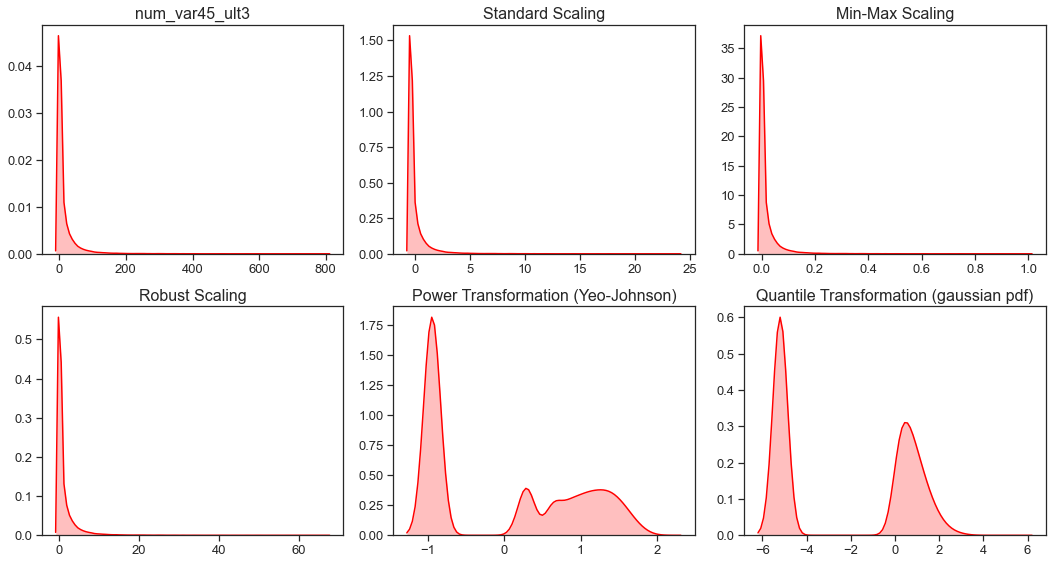

In [53]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var45_ult3', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var45_ult3_df, features=list(num_var45_ult3_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_histograms_fe_num_var45_ult3", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=0.30`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var45_ult3_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [54]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var45_ult3')

## `num_var5`

In [55]:
# Aplicando as transformações de escala na feature:
num_var5_df = mllib.scalers_transform(df=train_df, feature='num_var5')

# Visualizando as transformações:
num_var5_df

,num_var5,num_var5_sts,num_var5_mms,num_var5_rs,num_var5_pt,num_var5_qt
0,3,0.698455,0.2,0.0,0.691911,0.430727
1,3,0.698455,0.2,0.0,0.691911,0.430727
2,3,0.698455,0.2,0.0,0.691911,0.430727
3,3,0.698455,0.2,0.0,0.691911,0.430727
4,3,0.698455,0.2,0.0,0.691911,0.430727
...,...,...,...,...,...,...
60811,3,0.698455,0.2,0.0,0.691911,0.430727
60812,0,-1.396599,0.0,-1.0,-1.389113,-5.199338
60813,0,-1.396599,0.0,-1.0,-1.389113,-5.199338
60814,3,0.698455,0.2,0.0,0.691911,0.430727


In [56]:
# Resumo estatístico:
dslib.statistical_measures(df=num_var5_df, feature=list(num_var5_df.columns))

,num_var5,num_var5_sts,num_var5_mms,num_var5_rs,num_var5_pt,num_var5_qt
mean,2.000,-0.000000e+00,0.133,-0.333,-0.000000e+00,-1.455
median,3.000,6.980000e-01,0.200,0.000,6.920000e-01,0.431
mode,3.000,6.980000e-01,0.200,0.000,6.920000e-01,0.431
var,2.050,1.000000e+00,0.009,0.228,1.000000e+00,7.114
std,1.432,1.000000e+00,0.095,0.477,1.000000e+00,2.667
var_coff,71.603,-6.322557e+18,71.603,-143.174,-2.619558e+17,-183.362
skewness,-0.619,-6.190000e-01,-0.619,-0.619,-5.220000e-01,-0.684
kurtosis,-1.279,-1.279000e+00,-1.279,-1.279,-5.230000e-01,-1.509


Saving figure: plot_kde_fe_num_var5


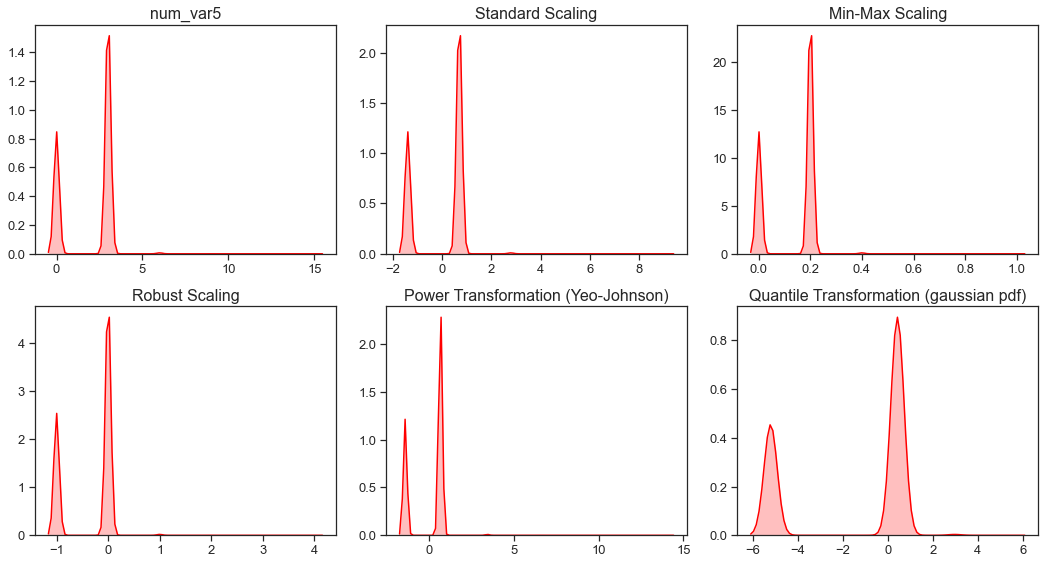

In [57]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['num_var5', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=num_var5_df, features=list(num_var5_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_num_var5", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-0.52`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`num_var5_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [58]:
# Salvando a feature discreta no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('num_var5')

## 5.3- Variáveis `Quantitativas Contínuas`:

In [59]:
# Obtem todas as variáveis preditoras (features) "Quantitativas Contínuas" (Relevantes):
continuous_feats = santander_relevant_feat.get(key='Continuous')
print("Continuous features: {}".format(continuous_feats))

Continuous features: ['var38', 'saldo_var42', 'saldo_var30', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_var5']


In [60]:
# Resumo Estatístico:
dslib.statistical_measures(df=train_df, feature=continuous_feats).T

,mean,median,mode,var,std,var_coff,skewness,kurtosis
var38,117640.847,106514.73,117310.979,3.592234e+10,189531.908,161.111,51.978,4281.352
saldo_var42,7316.827,3.00,0.000,2.570208e+09,50697.215,692.885,19.067,682.314
saldo_var30,13880.423,3.00,0.000,4.183318e+09,64678.575,465.970,12.612,356.923
saldo_medio_var5_hace2,1574.486,3.00,0.000,1.421212e+08,11921.458,757.165,22.371,906.086
saldo_medio_var5_hace3,889.203,0.99,0.000,1.064845e+08,10319.134,1160.493,75.016,9583.105
saldo_medio_var5_ult1,1084.740,3.00,0.000,8.818384e+07,9390.625,865.702,23.748,832.796
saldo_medio_var5_ult3,1056.021,2.73,0.000,6.504828e+07,8065.251,763.740,25.731,1122.725
saldo_var5,1023.580,3.00,0.000,9.275775e+07,9631.083,940.921,25.759,940.191


Saving figure: plot_KDE_continuous_feats


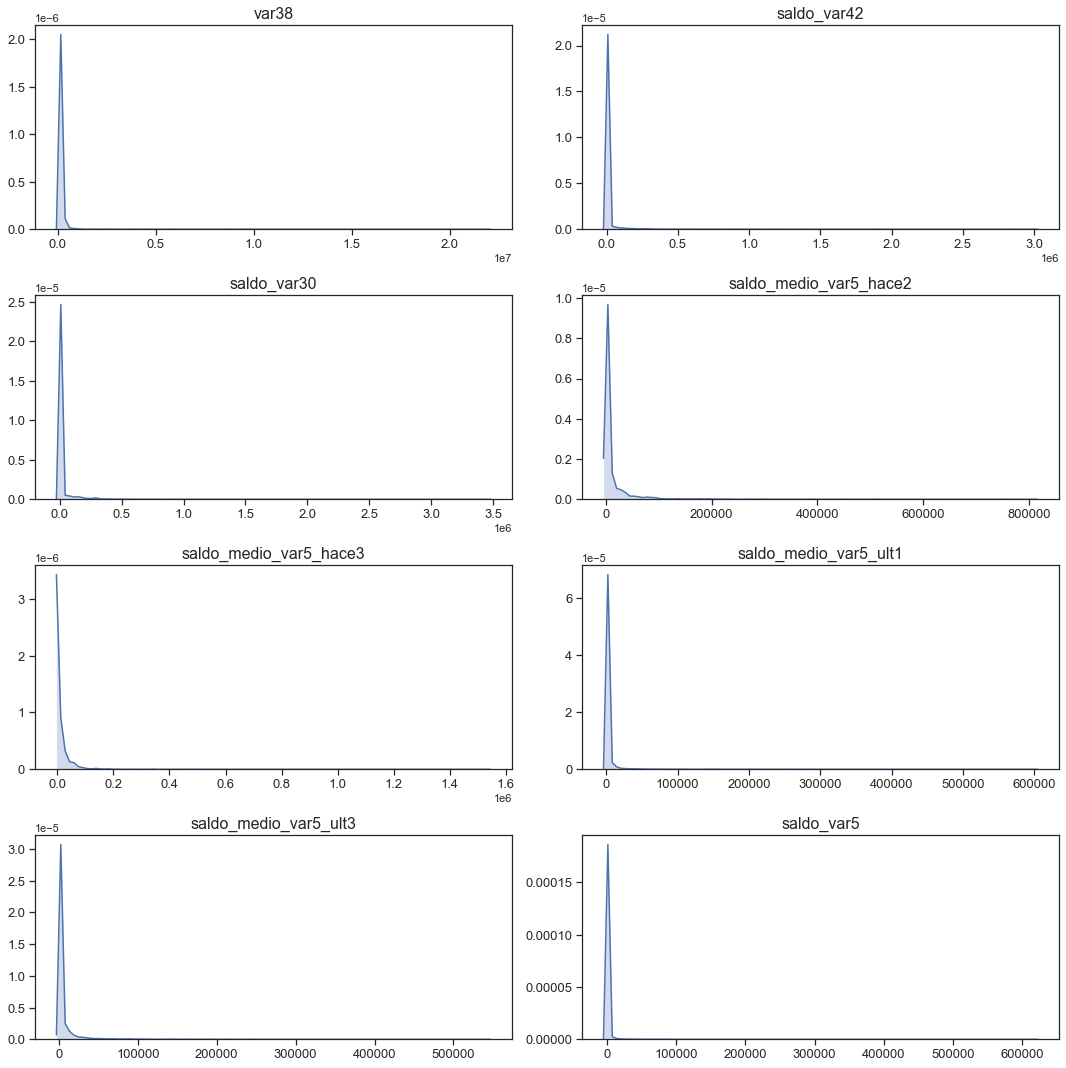

In [61]:
# Criando os plots KDEs para as features:
ptlib.plot_kde_features(df=train_df, features=continuous_feats, gridsize=100, plot_style='ticks', colors='b',
                        titles=continuous_feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, ylabels=None,
                        ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=2, rows_nr=4, width=15,
                        height=15, wspace=None, hspace=0.3,
                        figure_id="plot_KDE_continuous_feats", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:**

Todas as `features` possuem `outliers` (muito grandes em todas as features), de acordo com a nossa análise exploratória, e também conforme podemos observar nos gráficos acima. Também notamos que as `features`possuem escalas diferentes.

1. A feature **`var38`** possui uma alta distribuição assimétrica positiva (*`skewness=51.98`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`117310.979016`**;

2. A feature **`saldo_var42`** possui uma alta distribuição assimétrica positiva (*`skewness=19.07`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

3. A feature **`saldo_var30`** possui uma alta distribuição assimétrica positiva (*`skewness=12.61`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

4. A feature **`saldo_medio_var5_hace2`** possui uma alta distribuição assimétrica positiva (*`skewness=22.37`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

5. A feature **`saldo_medio_var5_hace3`** possui uma alta distribuição assimétrica positiva (*`skewness=75.02`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

6. A feature **`saldo_medio_var5_ult1`** possui uma alta distribuição assimétrica positiva (*`skewness=23.75`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

7. A feature **`saldo_medio_var5_ult3`** possui uma alta distribuição assimétrica positiva (*`skewness=25.73`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**;

8. A feature **`saldo_var5`** possui uma alta distribuição assimétrica positiva (*`skewness=25.76`*), ou seja, a sua distribuição apresenta uma *calda à direita*. Também observamos um *pico de frequências* para o valor **`0`**.

### `Feature Engineering`

Sabemos que muitos estimadores (algoritmos de *machine learning*) são concebidos com o pressuposto de que cada *feature* tenha valores próximos de zero (média) ou, mais importante ainda, que todas as *features* variam em escalas comparáveis. Em particular, os estimadores baseados em métricas e em gradientes assumem frequentemente dados aproximadamente padronizados (*features* centradas com variâncias unitárias). Uma excepção notável são os estimadores baseados em árvores de decisão, que são robustos a escalas arbitrárias dos dados.

Portanto, vamos aplicar e analisar algumas transformações em cada *feature* com o objetivo de prepará-las para as etapas de `Machine Learning`.

## `var38`

In [62]:
# Aplicando as transformações de escala na feature:
var38_df = mllib.scalers_transform(df=train_df, feature='var38')

# Visualizando as transformações:
var38_df

,var38,var38_sts,var38_mms,var38_rs,var38_pt,var38_qt
0,117310.979016,-0.001740,0.005091,0.211618,0.0,0.373591
1,68480.010000,-0.259382,0.002874,-0.745522,0.0,-0.658907
2,57517.740000,-0.317222,0.002377,-0.960395,0.0,-0.961963
3,60060.930000,-0.303803,0.002492,-0.910546,0.0,-0.884269
4,84028.740000,-0.177344,0.003580,-0.440750,0.0,-0.330224
...,...,...,...,...,...,...
60811,117310.979016,-0.001740,0.005091,0.211618,0.0,0.373591
60812,112033.230000,-0.029587,0.004851,0.108169,0.0,0.066748
60813,94660.560000,-0.121249,0.004063,-0.232355,0.0,-0.157761
60814,117148.140000,-0.002600,0.005083,0.208427,0.0,0.119871


In [63]:
# Resumo estatístico:
dslib.statistical_measures(df=var38_df, feature=list(var38_df.columns))

,var38,var38_sts,var38_mms,var38_rs,var38_pt,var38_qt
mean,1.176408e+05,-0.000000e+00,0.005,0.218,0.0,-0.001
median,1.065147e+05,-5.900000e-02,0.005,0.000,0.0,-0.000
mode,1.173110e+05,-2.000000e-03,0.005,0.212,0.0,0.374
var,3.592234e+10,1.000000e+00,0.000,13.801,0.0,0.992
std,1.895319e+05,1.000000e+00,0.009,3.715,0.0,0.996
var_coff,1.611110e+02,-4.396039e+17,168.507,1703.487,NaN,-86492.549
skewness,5.197800e+01,5.197800e+01,51.978,51.978,0.0,-0.005
kurtosis,4.281352e+03,4.281352e+03,4281.352,4281.352,0.0,-0.010


Saving figure: plot_kde_fe_var38


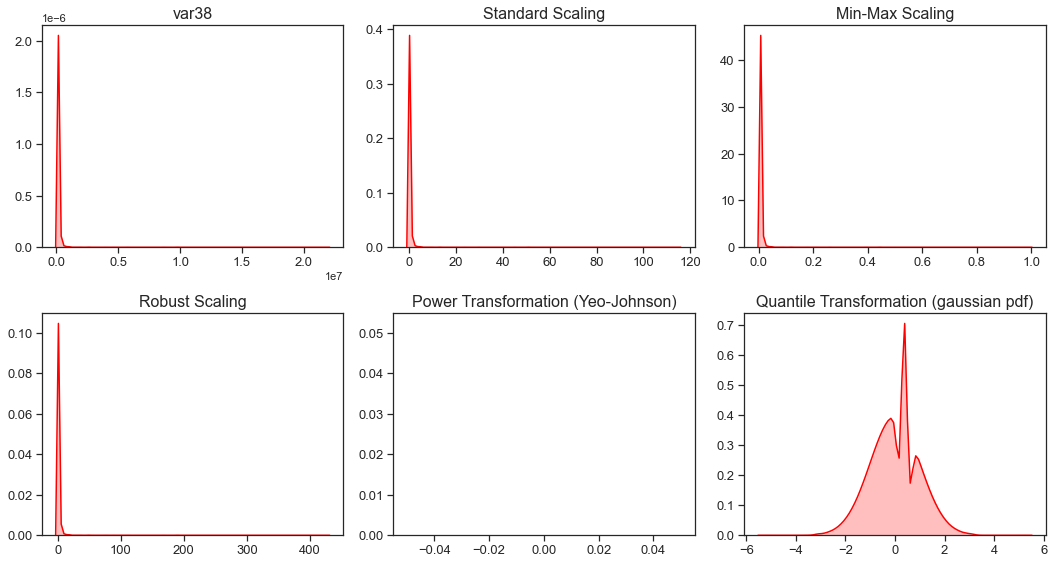

In [64]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['var38', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=var38_df, features=list(var38_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_var38", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Quantile Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-0.005`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`var38_qt`** para ser utilizada nas etapas de `Machine Learning`:

In [65]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "QuantileTransformer()":
santander_feat_eng["QuantileTransformation"] = ['var38']

## `saldo_var42`

In [66]:
# Aplicando as transformações de escala na feature:
saldo_var42_df = mllib.scalers_transform(df=train_df, feature='saldo_var42')

# Visualizando as transformações:
saldo_var42_df

,saldo_var42,saldo_var42_sts,saldo_var42_mms,saldo_var42_rs,saldo_var42_pt,saldo_var42_qt
0,3.00,-0.144266,0.001641,0.00000,-0.175927,-0.196979
1,42078.60,0.685680,0.015606,350.63000,1.360815,1.827754
2,3.00,-0.144266,0.001641,0.00000,-0.175927,-0.196979
3,3.00,-0.144266,0.001641,0.00000,-0.175927,-0.196979
4,3.00,-0.144266,0.001641,0.00000,-0.175927,-0.196979
...,...,...,...,...,...,...
60811,19.05,-0.143949,0.001647,0.13375,-0.167064,0.263209
60812,0.00,-0.144325,0.001640,-0.02500,-0.178933,-1.059682
60813,6.69,-0.144193,0.001643,0.03075,-0.173337,0.163653
60814,3.00,-0.144266,0.001641,0.00000,-0.175927,-0.196979


In [67]:
# Resumo estatístico:
dslib.statistical_measures(df=saldo_var42_df, feature=list(saldo_var42_df.columns))

,saldo_var42,saldo_var42_sts,saldo_var42_mms,saldo_var42_rs,saldo_var42_pt,saldo_var42_qt
mean,7.316827e+03,0.000000e+00,0.004,60.949,0.000000e+00,0.033
median,3.000000e+00,-1.440000e-01,0.002,0.000,-1.760000e-01,-0.197
mode,0.000000e+00,-1.440000e-01,0.002,-0.025,-1.790000e-01,-1.060
var,2.570208e+09,1.000000e+00,0.000,178486.638,1.000000e+00,0.847
std,5.069721e+04,1.000000e+00,0.017,422.477,1.000000e+00,0.921
var_coff,6.928850e+02,9.362173e+16,413.548,693.169,2.322895e+17,2779.448
skewness,1.906700e+01,1.906700e+01,19.067,19.067,-4.071900e+01,0.402
kurtosis,6.823140e+02,6.823140e+02,682.314,682.314,5.281838e+03,-0.294


Saving figure: plot_kde_fe_saldo_var42


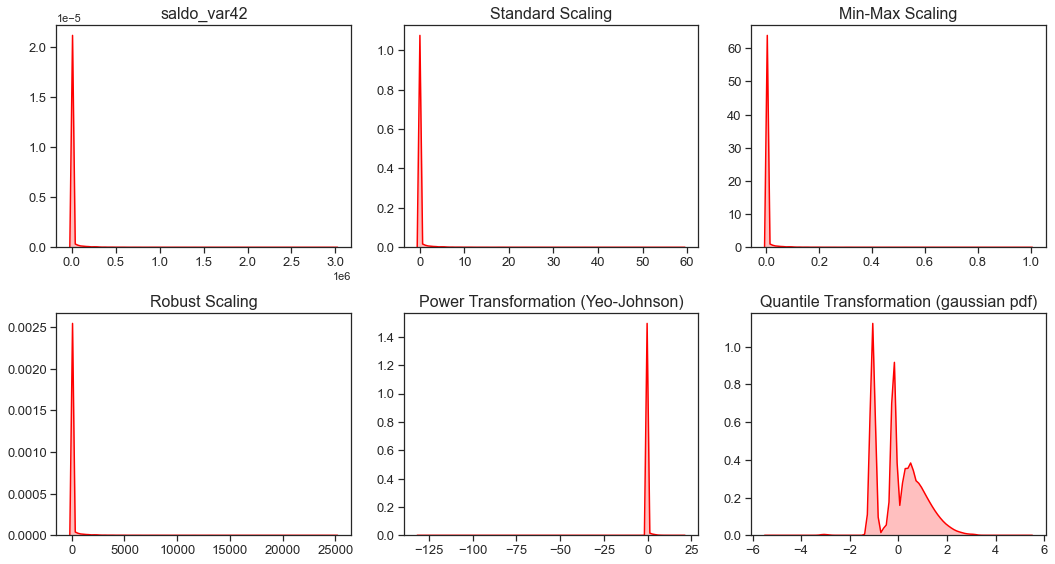

In [68]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['saldo_var42', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=saldo_var42_df, features=list(saldo_var42_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_saldo_var42", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-4.072`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`saldo_var42_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [69]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('saldo_var42')

## `saldo_var30`

In [70]:
# Aplicando as transformações de escala na feature:
saldo_var30_df = mllib.scalers_transform(df=train_df, feature='saldo_var30')

# Visualizando as transformações:
saldo_var30_df

,saldo_var30,saldo_var30_sts,saldo_var30_mms,saldo_var30_rs,saldo_var30_pt,saldo_var30_qt
0,3.00,-0.214562,0.001428,0.000000,-0.237457,-0.253606
1,42078.60,0.435978,0.013578,175.090665,0.954829,1.467617
2,3.00,-0.214562,0.001428,0.000000,-0.237457,-0.253606
3,3.00,-0.214562,0.001428,0.000000,-0.237457,-0.253606
4,3.00,-0.214562,0.001428,0.000000,-0.237457,-0.253606
...,...,...,...,...,...,...
60811,19.05,-0.214313,0.001433,0.066789,-0.229933,0.188783
60812,0.00,-0.214608,0.001427,-0.012484,-0.240062,-1.102440
60813,6.69,-0.214505,0.001429,0.015355,-0.235242,0.097994
60814,3.00,-0.214562,0.001428,0.000000,-0.237457,-0.253606


In [71]:
# Resumo estatístico:
dslib.statistical_measures(df=saldo_var30_df, feature=list(saldo_var30_df.columns))

,saldo_var30,saldo_var30_sts,saldo_var30_mms,saldo_var30_rs,saldo_var30_pt,saldo_var30_qt
mean,1.388042e+04,-0.000000e+00,0.005,57.749,0.000000e+00,0.031
median,3.000000e+00,-2.150000e-01,0.001,0.000,-2.370000e-01,-0.254
mode,0.000000e+00,-2.150000e-01,0.001,-0.012,-2.400000e-01,-1.102
var,4.183318e+09,1.000000e+00,0.000,72441.299,1.000000e+00,0.857
std,6.467857e+04,1.000000e+00,0.019,269.149,1.000000e+00,0.926
var_coff,4.659700e+02,-5.115447e+17,343.620,466.071,2.061207e+18,2961.360
skewness,1.261200e+01,1.261200e+01,12.612,12.612,-3.817100e+01,0.375
kurtosis,3.569230e+02,3.569230e+02,356.923,356.923,4.708944e+03,-0.305


Saving figure: plot_kde_fe_saldo_var30


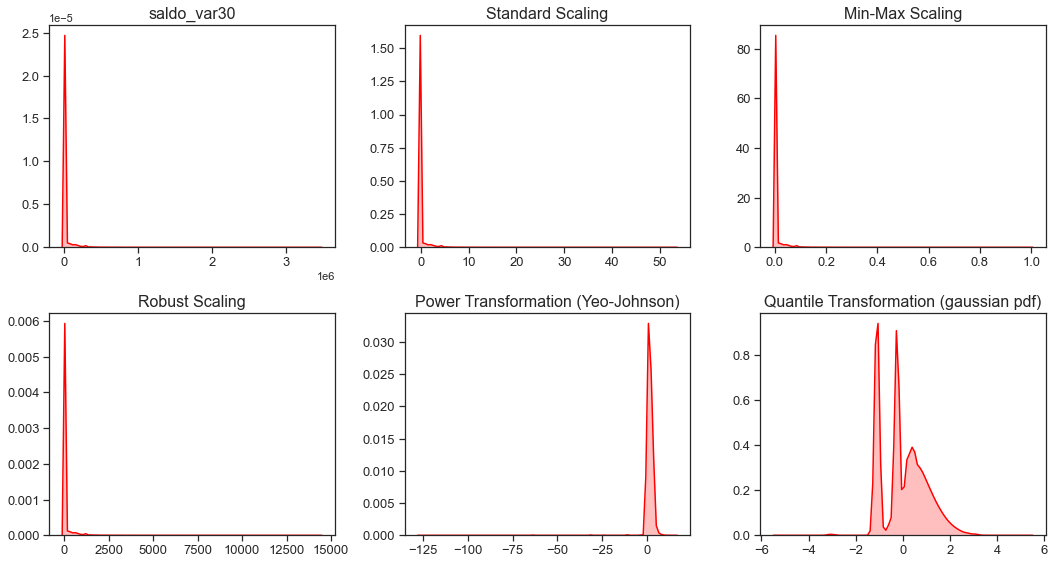

In [72]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['saldo_var30', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=saldo_var30_df, features=list(saldo_var30_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_saldo_var30", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-3.817`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`saldo_var30_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [73]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('saldo_var30')

## `saldo_medio_var5_hace2`

In [74]:
# Aplicando as transformações de escala na feature:
saldo_medio_var5_hace2_df = mllib.scalers_transform(df=train_df, feature='saldo_medio_var5_hace2')

# Visualizando as transformações:
saldo_medio_var5_hace2_df

,saldo_medio_var5_hace2,saldo_medio_var5_hace2_sts,saldo_medio_var5_hace2_mms,saldo_medio_var5_hace2_rs,saldo_medio_var5_hace2_pt,saldo_medio_var5_hace2_qt
0,3.00,-0.131821,0.000162,0.000000,-0.344933,-0.132113
1,14933.22,1.120571,0.018543,165.891333,2.534244,2.012139
2,3.00,-0.131821,0.000162,0.000000,-0.344933,-0.132113
3,3.00,-0.131821,0.000162,0.000000,-0.344933,-0.132113
4,2.67,-0.131849,0.000161,-0.003667,-0.352329,-0.464007
...,...,...,...,...,...,...
60811,16.56,-0.130684,0.000178,0.150667,-0.184896,0.307196
60812,0.00,-0.132073,0.000158,-0.033333,-0.444505,-1.023003
60813,0.00,-0.132073,0.000158,-0.033333,-0.444505,-1.023003
60814,3.00,-0.131821,0.000162,0.000000,-0.344933,-0.132113


In [75]:
# Resumo estatístico:
dslib.statistical_measures(df=saldo_medio_var5_hace2_df, feature=list(saldo_medio_var5_hace2_df.columns)).T

,mean,median,mode,var,std,var_coff,skewness,kurtosis
saldo_medio_var5_hace2,1574.486,3.000,0.000,1.421212e+08,11921.458,7.571650e+02,22.371,906.086
saldo_medio_var5_hace2_sts,0.000,-0.132,-0.132,1.000000e+00,1.000,1.668700e+17,22.371,906.086
saldo_medio_var5_hace2_mms,0.002,0.000,0.000,0.000000e+00,0.015,7.000860e+02,22.371,906.086
saldo_medio_var5_hace2_rs,17.461,0.000,-0.033,1.754582e+04,132.461,7.586100e+02,22.371,906.086
saldo_medio_var5_hace2_pt,-0.000,-0.345,-0.445,1.000000e+00,1.000,-3.520138e+18,-47.991,6955.837
saldo_medio_var5_hace2_qt,0.037,-0.132,-1.023,8.280000e-01,0.910,2.437235e+03,0.471,-0.391


Saving figure: plot_kde_fe_saldo_medio_var5_hace2


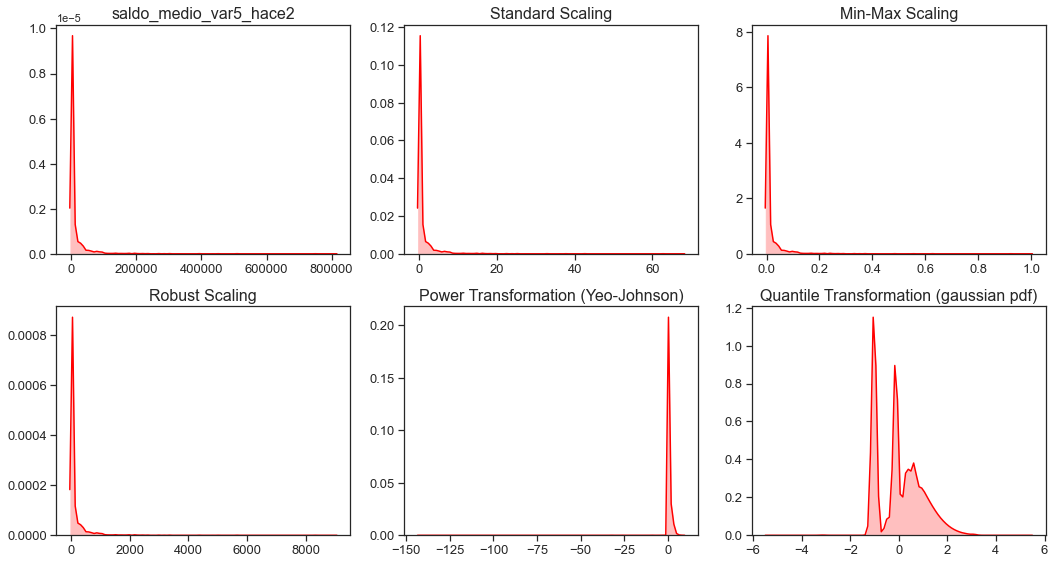

In [76]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['saldo_medio_var5_hace2', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=saldo_medio_var5_hace2_df, features=list(saldo_medio_var5_hace2_df.columns), gridsize=100,
                        plot_style='ticks', colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_saldo_medio_var5_hace2", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-47.991`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`saldo_medio_var5_hace2_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [77]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('saldo_medio_var5_hace2')

## `saldo_medio_var5_hace3`

In [78]:
# Aplicando as transformações de escala na feature:
saldo_medio_var5_hace3_df = mllib.scalers_transform(df=train_df, feature='saldo_medio_var5_hace3')

# Visualizando as transformações:
saldo_medio_var5_hace3_df

,saldo_medio_var5_hace3,saldo_medio_var5_hace3_sts,saldo_medio_var5_hace3_mms,saldo_medio_var5_hace3_rs,saldo_medio_var5_hace3_pt,saldo_medio_var5_hace3_qt
0,1.56,-0.086020,0.000006,0.045783,-0.105498,0.129582
1,8.28,-0.085369,0.000011,0.585542,0.631102,0.588431
2,1.44,-0.086031,0.000006,0.036145,-0.138695,0.115678
3,1.95,-0.085982,0.000006,0.077108,-0.010133,0.231641
4,0.00,-0.086171,0.000005,-0.079518,-0.848522,-0.858910
...,...,...,...,...,...,...
60811,1.20,-0.086055,0.000006,0.016867,-0.211898,0.072829
60812,0.00,-0.086171,0.000005,-0.079518,-0.848522,-0.858910
60813,0.00,-0.086171,0.000005,-0.079518,-0.848522,-0.858910
60814,0.63,-0.086110,0.000006,-0.028916,-0.436879,-0.087933


In [79]:
# Resumo estatístico:
dslib.statistical_measures(df=saldo_medio_var5_hace3_df, feature=list(saldo_medio_var5_hace3_df.columns)).T

,mean,median,mode,var,std,var_coff,skewness,kurtosis
saldo_medio_var5_hace3,889.203,0.990,0.000,1.064845e+08,10319.134,1.160493e+03,75.016,9583.105
saldo_medio_var5_hace3_sts,0.000,-0.086,-0.086,1.000000e+00,1.000,1.215296e+17,75.016,9583.105
saldo_medio_var5_hace3_mms,0.001,0.000,0.000,0.000000e+00,0.007,1.150094e+03,75.016,9583.105
saldo_medio_var5_hace3_rs,71.342,0.000,-0.080,6.869858e+05,828.846,1.161786e+03,75.016,9583.105
saldo_medio_var5_hace3_pt,0.000,-0.285,-0.849,1.000000e+00,1.000,7.994150e+16,-4.509,279.716
saldo_medio_var5_hace3_qt,0.048,0.010,-0.859,7.870000e-01,0.887,1.840526e+03,0.607,-0.412


Saving figure: plot_kde_fe_saldo_medio_var5_hace3


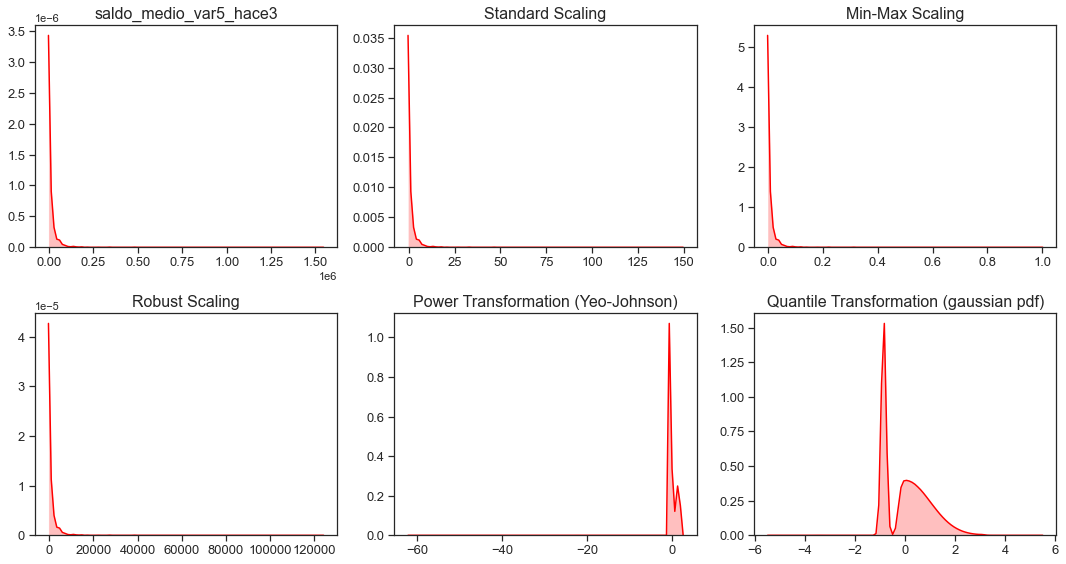

In [80]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['saldo_medio_var5_hace3', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=saldo_medio_var5_hace3_df, features=list(saldo_medio_var5_hace3_df.columns), gridsize=100,
                        plot_style='ticks', colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_saldo_medio_var5_hace3", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-4.509`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`saldo_medio_var5_hace3_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [81]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('saldo_medio_var5_hace3')

## `saldo_medio_var5_ult1`

In [82]:
# Aplicando as transformações de escala na feature:
saldo_medio_var5_ult1_df = mllib.scalers_transform(df=train_df, feature='saldo_medio_var5_ult1')

# Visualizando as transformações:
saldo_medio_var5_ult1_df

,saldo_medio_var5_ult1,saldo_medio_var5_ult1_sts,saldo_medio_var5_ult1_mms,saldo_medio_var5_ult1_rs,saldo_medio_var5_ult1_pt,saldo_medio_var5_ult1_qt
0,3.00,-0.115195,0.001536,0.000000,-0.218511,-0.108103
1,30.00,-0.112319,0.001581,0.300000,-0.152006,0.391137
2,3.00,-0.115195,0.001536,0.000000,-0.218511,-0.108103
3,3.00,-0.115195,0.001536,0.000000,-0.218511,-0.108103
4,3.00,-0.115195,0.001536,0.000000,-0.218511,-0.108103
...,...,...,...,...,...,...
60811,19.05,-0.113485,0.001563,0.178333,-0.172910,0.343503
60812,0.00,-0.115514,0.001531,-0.033333,-0.235702,-0.983573
60813,0.00,-0.115514,0.001531,-0.033333,-0.235702,-0.983573
60814,3.00,-0.115195,0.001536,0.000000,-0.218511,-0.108103


In [83]:
# Resumo estatístico:
dslib.statistical_measures(df=saldo_medio_var5_ult1_df, feature=list(saldo_medio_var5_ult1_df.columns)).T

,mean,median,mode,var,std,var_coff,skewness,kurtosis
saldo_medio_var5_ult1,1084.740,3.000,0.000,8.818384e+07,9390.625,8.657020e+02,23.748,832.796
saldo_medio_var5_ult1_sts,0.000,-0.115,-0.116,1.000000e+00,1.000,8.072378e+16,23.748,832.796
saldo_medio_var5_ult1_mms,0.003,0.002,0.002,0.000000e+00,0.016,4.678660e+02,23.748,832.796
saldo_medio_var5_ult1_rs,12.019,0.000,-0.033,1.088689e+04,104.340,8.681030e+02,23.748,832.796
saldo_medio_var5_ult1_pt,-0.000,-0.219,-0.236,1.000000e+00,1.000,-2.550569e+17,-36.789,4242.989
saldo_medio_var5_ult1_qt,0.039,-0.108,-0.984,8.200000e-01,0.906,2.309057e+03,0.490,-0.355


Saving figure: plot_kde_fe_saldo_medio_var5_ult1


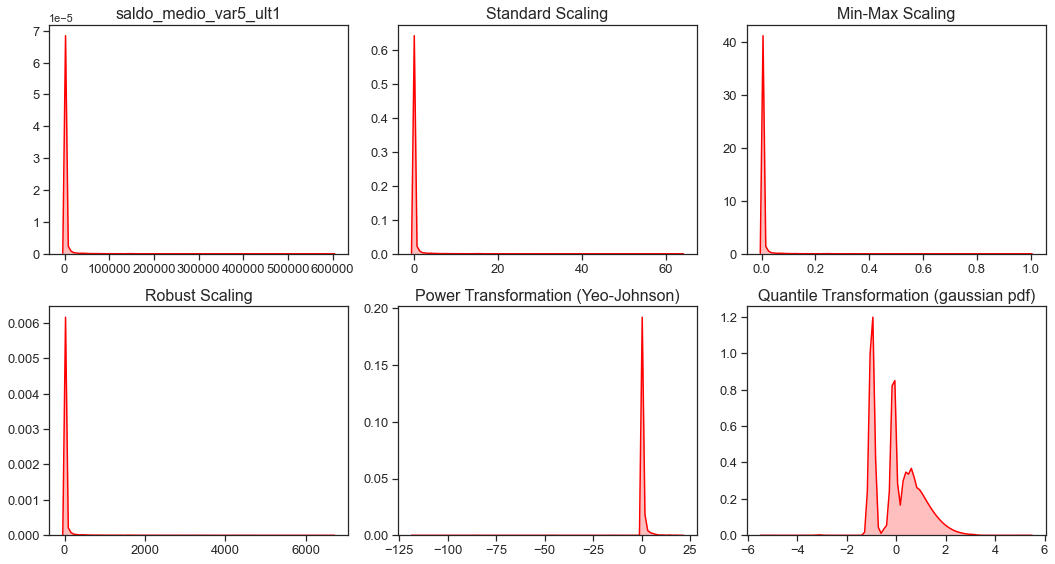

In [84]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['saldo_medio_var5_ult1', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=saldo_medio_var5_ult1_df, features=list(saldo_medio_var5_ult1_df.columns), gridsize=100,
                        plot_style='ticks', colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_saldo_medio_var5_ult1", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-36.789`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`saldo_medio_var5_ult1_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [85]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('saldo_medio_var5_ult1')

## `saldo_medio_var5_ult3`

In [86]:
# Aplicando as transformações de escala na feature:
saldo_medio_var5_ult3_df = mllib.scalers_transform(df=train_df, feature='saldo_medio_var5_ult3')

# Visualizando as transformações:
saldo_medio_var5_ult3_df

,saldo_medio_var5_ult3,saldo_medio_var5_ult3_sts,saldo_medio_var5_ult3_mms,saldo_medio_var5_ult3_rs,saldo_medio_var5_ult3_pt,saldo_medio_var5_ult3_qt
0,2.52,-0.130623,0.000878,-0.002504,-0.280260,-0.105580
1,4990.50,0.487835,0.010033,59.463162,1.589672,1.802401
2,2.49,-0.130627,0.000878,-0.002861,-0.280530,-0.120731
3,2.64,-0.130608,0.000879,-0.001073,-0.279195,-0.031369
4,2.85,-0.130582,0.000879,0.001431,-0.277376,0.076604
...,...,...,...,...,...,...
60811,12.27,-0.129414,0.000896,0.113734,-0.222565,0.263428
60812,0.00,-0.130936,0.000874,-0.032546,-0.310372,-0.983573
60813,0.00,-0.130936,0.000874,-0.032546,-0.310372,-0.983573
60814,2.22,-0.130660,0.000878,-0.006080,-0.283012,-0.283522


In [87]:
# Resumo estatístico:
dslib.statistical_measures(df=saldo_medio_var5_ult3_df, feature=list(saldo_medio_var5_ult3_df.columns)).T

,mean,median,mode,var,std,var_coff,skewness,kurtosis
saldo_medio_var5_ult3,1056.021,2.730,0.000,6.504828e+07,8065.251,7.637400e+02,25.731,1122.725
saldo_medio_var5_ult3_sts,0.000,-0.131,-0.131,1.000000e+00,1.000,9.271561e+16,25.731,1122.725
saldo_medio_var5_ult3_mms,0.003,0.001,0.001,0.000000e+00,0.015,5.264210e+02,25.731,1122.725
saldo_medio_var5_ult3_rs,12.557,0.000,-0.033,9.245257e+03,96.152,7.657190e+02,25.731,1122.725
saldo_medio_var5_ult3_pt,-0.000,-0.278,-0.310,1.000000e+00,1.000,-4.416875e+17,-56.436,8942.862
saldo_medio_var5_ult3_qt,0.040,0.005,-0.984,8.260000e-01,0.909,2.296020e+03,0.494,-0.431


Saving figure: plot_kde_fe_saldo_medio_var5_ult3


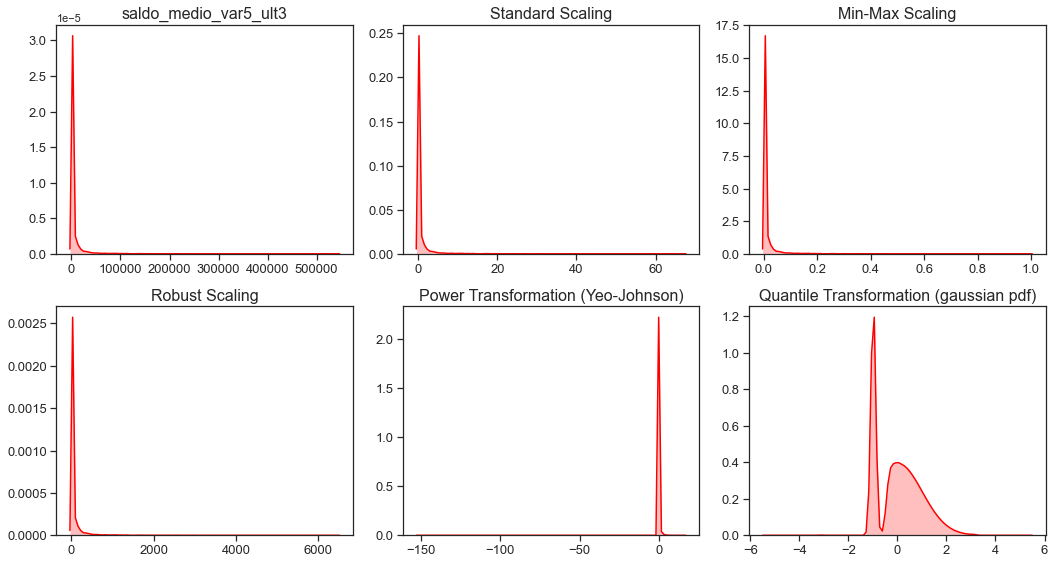

In [88]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['saldo_medio_var5_ult3', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=saldo_medio_var5_ult3_df, features=list(saldo_medio_var5_ult3_df.columns), gridsize=100,
                        plot_style='ticks', colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_saldo_medio_var5_ult3", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-56.436`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`saldo_medio_var5_ult3_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [89]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('saldo_medio_var5_ult3')

## `saldo_var5`

In [90]:
# Aplicando as transformações de escala na feature:
saldo_var5_df = mllib.scalers_transform(df=train_df, feature='saldo_var5')

# Visualizando as transformações:
saldo_var5_df

,saldo_var5,saldo_var5_sts,saldo_var5_mms,saldo_var5_rs,saldo_var5_pt,saldo_var5_qt
0,3.00,-0.105968,0.002970,0.000000,-0.176950,-0.067799
1,30.00,-0.103165,0.003014,0.300000,-0.133334,0.457033
2,3.00,-0.105968,0.002970,0.000000,-0.176950,-0.067799
3,3.00,-0.105968,0.002970,0.000000,-0.176950,-0.067799
4,3.00,-0.105968,0.002970,0.000000,-0.176950,-0.067799
...,...,...,...,...,...,...
60811,19.05,-0.104302,0.002996,0.178333,-0.147610,0.403427
60812,0.00,-0.106280,0.002965,-0.033333,-0.186955,-0.955471
60813,0.00,-0.106280,0.002965,-0.033333,-0.186955,-0.955471
60814,3.00,-0.105968,0.002970,0.000000,-0.176950,-0.067799


In [91]:
# Resumo estatístico:
dslib.statistical_measures(df=saldo_var5_df, feature=list(saldo_var5_df.columns))

,saldo_var5,saldo_var5_sts,saldo_var5_mms,saldo_var5_rs,saldo_var5_pt,saldo_var5_qt
mean,1.023580e+03,-0.000000e+00,0.005,11.340,-0.000000e+00,0.040
median,3.000000e+00,-1.060000e-01,0.003,0.000,-1.770000e-01,-0.068
mode,0.000000e+00,-1.060000e-01,0.003,-0.033,-1.870000e-01,-0.955
var,9.275775e+07,1.000000e+00,0.000,11451.574,1.000000e+00,0.818
std,9.631083e+03,1.000000e+00,0.016,107.012,1.000000e+00,0.905
var_coff,9.409210e+02,-1.873739e+17,336.095,943.687,-1.059901e+17,2245.613
skewness,2.575900e+01,2.575900e+01,25.759,25.759,-3.364500e+01,0.481
kurtosis,9.401910e+02,9.401910e+02,940.191,940.191,3.892773e+03,-0.274


Saving figure: plot_kde_fe_saldo_var5


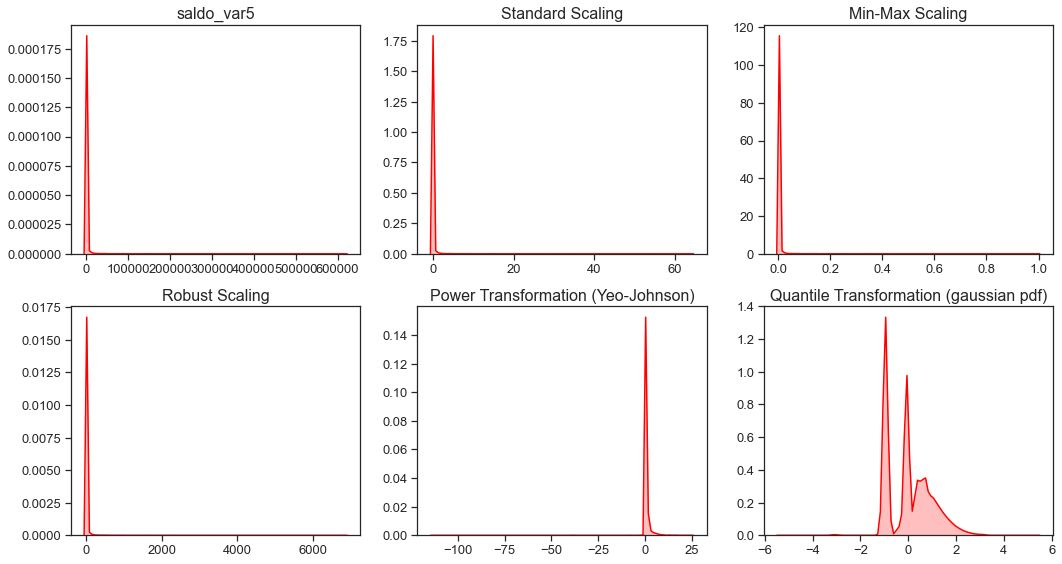

In [92]:
# Criando os plots KDEs para compararmos as features transformadas:
titles=['saldo_var5', 'Standard Scaling', 'Min-Max Scaling', 'Robust Scaling', 'Power Transformation (Yeo-Johnson)',
        'Quantile Transformation (gaussian pdf)']

# Histograms:
ptlib.plot_kde_features(df=saldo_var5_df, features=list(saldo_var5_df.columns), gridsize=100, plot_style='ticks',
                        colors='red', titles=titles, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, 
                        ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13, cols_nr=3,
                        rows_nr=2, width=15, height=8, wspace=None, hspace=0.3,
                        figure_id="plot_kde_fe_saldo_var5", figure_path=PROJECT_IMG_PATH,
                        figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                       )

**Análise:** de acordo com os resultados, com a **`Power Transformation`** conseguimos obter **`mean=0`**, **`var=1`** e reduzimos a sua assimetria/enviesamento (**`skewness=-33.645`**), ou seja, os dados foram mapeados para uma distribuição normal.

**Conclusão:** portanto, escolheremos a *feature* **`saldo_var5_pt`** para ser utilizada nas etapas de `Machine Learning`:

In [93]:
# Salvando a feature numérica contínua no objeto "santander_feat_eng", onde aplicaremos a função "PowerTransformer()":
santander_feat_eng["PowerTransformation"].append('saldo_var5')

### Aplicando a função `QuantileTransformer()` nas features `numéricas` (Quantitativas) do *data frame*:

In [94]:
# Visializando todas as "features" onde aplicaremos a função "QuantileTransformer()":
print("Feature Engineering (Quantile Transformation): {}".format(len(santander_feat_eng["QuantileTransformation"])))
print(santander_feat_eng["QuantileTransformation"])

Feature Engineering (Quantile Transformation): 1
['var38']


In [95]:
# Criando uma cópia das features numéricas onde aplicaremos a função "QuantileTransformer()":
num_feat_df = train_df[santander_feat_eng["QuantileTransformation"]].copy()

# Padronizando as features com a função:
qt_num_feat = qt.fit_transform(num_feat_df)

# Criando um novo "data frame" com as features transformadas:
cols = [feat + "_qt" for feat in num_feat_df.columns]
qt_num_feat_df = pd.DataFrame(qt_num_feat, columns=cols)

### Aplicando a função `PowerTransformer()` nas features `numéricas` (Quantitativas) do *data frame*:

In [96]:
# Visializando todas as "features" onde aplicaremos a função "PowerTransformer()":
print("Feature Engineering (Power Transformation): {}".format(len(santander_feat_eng["PowerTransformation"])))
print(santander_feat_eng["PowerTransformation"])

Feature Engineering (Power Transformation): 17
['var15', 'num_var35', 'num_var42', 'num_var22_ult3', 'num_var30', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'num_var5', 'saldo_var42', 'saldo_var30', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_var5']


In [97]:
# Criando uma cópia das features numéricas onde aplicaremos a função "PowerTransformer()":
num_feat_df = train_df[santander_feat_eng["PowerTransformation"]].copy()

# Padronizando as features com a função:
pt_num_feat = pt.fit_transform(num_feat_df)

# Criando um novo "data frame" com as features transformadas:
cols = [feat + "_pt" for feat in num_feat_df.columns]
pt_num_feat_df = pd.DataFrame(pt_num_feat, columns=cols)

### Atualizando o *data frame* de `treinamento` com as features numéricas *transformadas*:

In [98]:
# Excluindo as "features" "Quantitativas Discretas e Contínuas" do nosso data frame de treinamento:
num_feats = discrete_feats + continuous_feats
train_df.drop(columns=num_feats, inplace=True)

# Incluindo as features "Quantitativas Discretas e Contínuas" ("transformadas") em nosso data frame de treinamento:
train_df = pd.concat([train_df, qt_num_feat_df, pt_num_feat_df], axis=1)

# Resumo do nosso data frame de treinamento:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 42 columns):
Satisfaction                      60816 non-null int64
ind_var30_cat_0                   60816 non-null float64
ind_var30_cat_1                   60816 non-null float64
num_var4_cat_0                    60816 non-null float64
num_var4_cat_1                    60816 non-null float64
num_var4_cat_2                    60816 non-null float64
num_var4_cat_3                    60816 non-null float64
num_var4_cat_4                    60816 non-null float64
num_var4_cat_5                    60816 non-null float64
num_var4_cat_6                    60816 non-null float64
num_var4_cat_7                    60816 non-null float64
var36_cat_0                       60816 non-null float64
var36_cat_1                       60816 non-null float64
var36_cat_2                       60816 non-null float64
var36_cat_3                       60816 non-null float64
var36_cat_99                      6081

## 06- Salvando informações (`objetos`) importantes criados nesta etapa:

Agora, vamos salvar os seguintes `objetos` (**importantes**), que serão utilizados nas próximas fases do projeto:

1. **`santander_feat_eng`:** objeto (dicionário) com informações sobre cada uma das transformações (**`Feature Engineering`**) que foram realizadas nas features **`Relevantes`** do nosso *data frame* de treinamento;

2. **`ohe`:** instância (objeto) criado da classe **`OneHotEncoder()`** onde foram realizadas transformações (**`Feature Engineering`**) nas features **`Categóricas`** do nosso *data frame* de treinamento;

3. **`pt`:** instância (objeto) criado da classe **`PowerTransformer()`** onde foram realizadas transformações (**`Feature Engineering`**) nas features **`Numéricas`** do nosso *data frame* de treinamento;

4. **`qt`:** instância (objeto) criado da classe **`QuantileTransformer()`** onde foram realizadas transformações (**`Feature Engineering`**) nas features **`Numéricas`** do nosso *data frame* de treinamento.

In [99]:
# 1. Salvando o objeto "santander_feat_eng":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="santander_feat_eng.pickle", object_name=santander_feat_eng,
                          msg="The 'santander_feat_eng' object has been successfully saved!")

# 2. Salvando o objeto "ohe":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="OneHotEncoder.pickle", object_name=ohe,
                          msg="The 'ohe' object has been successfully saved!")

# 3. Salvando o objeto "pt":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="PowerTransformer.pickle", object_name=pt,
                          msg="The 'pt' object has been successfully saved!")

# 4. Salvando o objeto "qt":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="QuantileTransformer.pickle", object_name=qt,
                          msg="The 'qt' object has been successfully saved!")

The 'santander_feat_eng' object has been successfully saved!
The 'ohe' object has been successfully saved!
The 'pt' object has been successfully saved!
The 'qt' object has been successfully saved!


## 07- Salvando o *data frame* de `treinamento`:

> 7.1 **`santander_train_v2.pickle`**: dados de treinamento alterados nesta etapa.

In [100]:
# 7.1 Salvando o data frame "train_df":
dslib.pickle_object_save (path=PROJECT_DATA_PATH, file="santander_train_v2.pickle", object_name=train_df,
                          msg="The 'santander_train_v2' (data frame) has been successfully saved!")

The 'santander_train_v2' (data frame) has been successfully saved!


## <font color='black'>FIM</font>